In [9]:
from utils.useCMSstyle import *
plt.style.use(CMS)

import awkward as ak
import uproot as up

In [3]:
def pt_bins(emax, nedges=41):
    return np.linspace(20,emax,nedges)

In [3]:
# pt_bins = np.linspace(20,400,81)
njet_bins = np.arange(5,25)
score_bins = np.arange(0, 1.01,0.01)

In [77]:
cutflow = up.open("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixB/analysis/sixBanalysis/output.root:h_cutflow_unweighted")
tree = up.open("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixB/analysis/sixBanalysis/output.root:sixBtree")

In [78]:
for label, value in zip(cutflow.axis().labels(), cutflow.to_numpy()[0]):
    print(f"{int(value)} : {label}")

1000 : total
700 : trigger
584 : npresel_jets >= 6
482 : selected jets >= 6


In [5]:
tree['gen_HX_b1_recojet_btag'].array()

<Array [0.992, 0.998, 0.999, ... 0.354, 0.94] type='979 * float32'>

In [35]:
njet_bins.dtype, np.issubdtype(njet_bins.dtype, int)

(dtype('int64'), True)

In [4]:
f_nocuts = "/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/nocuts/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root"
f_trigger = "/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/trigger/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root"
f_presel = "/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/presel/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root"
f_bias = "/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root"
# f_btag_pt = 

In [39]:
nocuts = Signal(f_nocuts)
print(nocuts.cutflow)
print(nocuts.nevents)

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/nocuts/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root
[17922 17922 17567 17567]
96552


In [4]:
nocuts_HX_b1_sigID = nocuts.jet_signalId == 0
nocuts_HX_b2_sigID = nocuts.jet_signalId == 1
ak.sum(ak.sum(nocuts.jet_ptRegressed[nocuts_HX_b1_sigID] > 0, axis=1) == 1)

94764

In [6]:
HX_b1_eta = ak.flatten(nocuts.jet_eta[nocuts.jet_signalId == 0])
HX_b2_eta = ak.flatten(nocuts.jet_eta[nocuts.jet_signalId == 1])
H1_b1_eta = ak.flatten(nocuts.jet_eta[nocuts.jet_signalId == 2])
H1_b2_eta = ak.flatten(nocuts.jet_eta[nocuts.jet_signalId == 3])
H2_b1_eta = ak.flatten(nocuts.jet_eta[nocuts.jet_signalId == 4])
H2_b2_eta = ak.flatten(nocuts.jet_eta[nocuts.jet_signalId == 5])

In [11]:
HX_b1_pt = ak.flatten(nocuts.jet_pt[nocuts.jet_signalId == 0])
HX_b2_pt = ak.flatten(nocuts.jet_pt[nocuts.jet_signalId == 1])
H1_b1_pt = ak.flatten(nocuts.jet_pt[nocuts.jet_signalId == 2])
H1_b2_pt = ak.flatten(nocuts.jet_pt[nocuts.jet_signalId == 3])
H2_b1_pt = ak.flatten(nocuts.jet_pt[nocuts.jet_signalId == 4])
H2_b2_pt = ak.flatten(nocuts.jet_pt[nocuts.jet_signalId == 5])

<AxesSubplot:title={'right':'$M_X=$ 700 GeV, $M_Y=$ 400 GeV'}, ylabel='AU'>

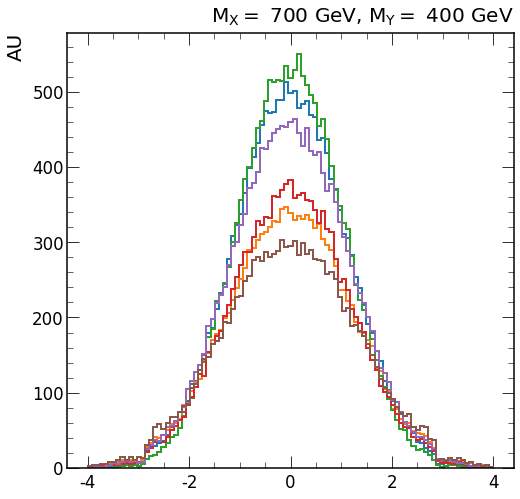

In [11]:
fig, ax = plt.subplots()

nocuts.hist(HX_b1_eta, bins=np.linspace(-4, 4, 100), ax=ax)
nocuts.hist(HX_b2_eta, bins=np.linspace(-4, 4, 100), ax=ax)
nocuts.hist(H1_b1_eta, bins=np.linspace(-4, 4, 100), ax=ax)
nocuts.hist(H1_b2_eta, bins=np.linspace(-4, 4, 100), ax=ax)
nocuts.hist(H2_b1_eta, bins=np.linspace(-4, 4, 100), ax=ax)
nocuts.hist(H2_b2_eta, bins=np.linspace(-4, 4, 100), ax=ax)

In [7]:
from matplotlib.patches import Rectangle

In [24]:
n_hi = ak.sum(H2_b2_eta > +2.5)
n_lo = ak.sum(H2_b2_eta < -2.5)
n_lost_eta = n_hi + n_lo

n_hi, n_lo, n_lost_eta

(1807, 1842, 3649)

In [27]:
round(n_lost_eta / len(H2_b2_eta), 3)*100

5.4

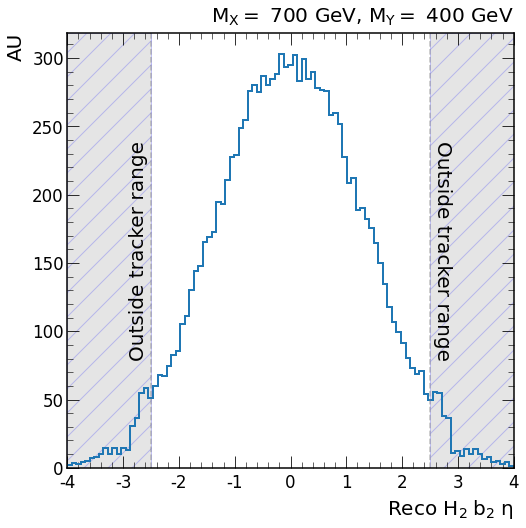

In [36]:
fig, ax = plt.subplots()

n = nocuts.hist(H2_b2_eta, bins=np.linspace(-4, 4, 100), ax=ax, zorder=999)
yl, yh = ax.get_ylim()

ax.add_patch(Rectangle((-4,0),1.5,yh, facecolor='gray', edgecolor='blue', alpha=0.2, hatch='/'))
ax.add_patch(Rectangle((2.5,0),1.5,yh, facecolor='gray', edgecolor='blue', alpha=0.2, hatch='/'))

ax.plot([-2.5,-2.5],[0, yh], 'gray', linestyle='--', alpha=0.5)
ax.plot([+2.5,+2.5],[0, yh], 'gray', linestyle='--', alpha=0.5)

ax.text(0.16, 0.5, 'Outside tracker range', transform=ax.transAxes, rotation='vertical', ha='center', va='center')
ax.text(0.84, 0.5, 'Outside tracker range', transform=ax.transAxes, rotation=270, ha='center', va='center')

ax.set_xlim(-4,4)
ax.set_ylim(0,yh)

ax.set_xlabel(r"Reco $H_2 \; b_2 \; \eta$")

plt.savefig('plots/1_signal_exploration/signal_loss/H2_b2_eta.pdf')

In [33]:
n_lost_pt = ak.sum(H2_b2_pt < 20)
round(n_lost_pt / len(H2_b2_pt) * 100)

10

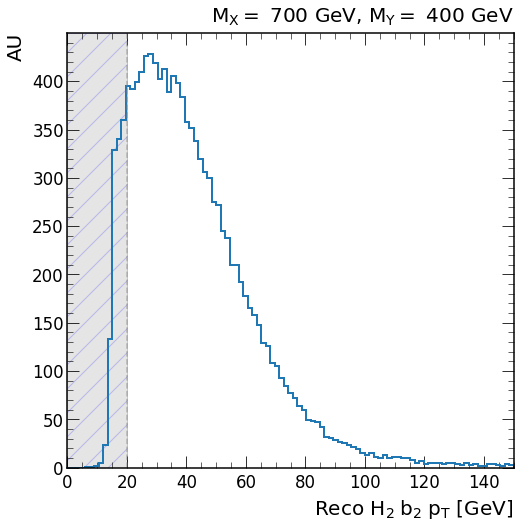

In [35]:
fig, ax = plt.subplots()

n = nocuts.hist(H2_b2_pt, bins=np.linspace(0, 150, 100), ax=ax, zorder=999)
yl, yh = ax.get_ylim()

ax.add_patch(Rectangle((0,0),20,yh, facecolor='gray', edgecolor='blue', alpha=0.2, hatch='/'))
# ax.add_patch(Rectangle((2.5,0),1.5,yh, facecolor='gray', edgecolor='blue', alpha=0.2, hatch='/'))

ax.plot([20,20],[0, yh], 'gray', linestyle='--', alpha=0.5)
# ax.plot([+2.5,+2.5],[0, yh], 'gray', linestyle='--', alpha=0.5)

# ax.text(0.16, 0.5, 'Outside tracker range', transform=ax.transAxes, rotation='vertical', ha='center', va='center')
# ax.text(0.84, 0.5, 'Outside tracker range', transform=ax.transAxes, rotation=270, ha='center', va='center')

ax.set_xlim(0,150)
ax.set_ylim(0,yh)

ax.set_xlabel(r"Reco $H_2 \; b_2 \; p_T$ [GeV]")

plt.savefig('plots/1_signal_exploration/signal_loss/H2_b2_pt.pdf')

In [41]:
trigger = Signal(f_trigger)
print(trigger.cutflow)
print(trigger.nevents)

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/trigger/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root
[17922 12611 12457 12457]
68469


In [42]:
n_HX = ak.sum((trigger.jet_signalId // 2 == 0), axis=1) == 2
n_H1 = ak.sum((trigger.jet_signalId // 2 == 1), axis=1) == 2
n_H2 = ak.sum((trigger.jet_signalId // 2 == 2), axis=1) == 2

n_h_trigger = np.sum(np.column_stack((n_HX.to_numpy(), n_H1.to_numpy(), n_H2.to_numpy())), axis=1)

In [2]:
from utils.analysis import Signal

/uscms_data/d3/srosenzw/mambaforge/envs/sixb/lib/python3.9/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


Welcome to JupyROOT 6.26/06


In [5]:
presel = Signal(f_presel)
print(presel.cutflow)
print(presel.nevents)

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/NMSSM_cutflow_studies/presel/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root
[17922 12611 10180 10180]
55952


In [8]:
import awkward as ak

In [9]:
ak.sum(ak.sum(presel.jet_signalId > -1, axis=1) == 6) / len(presel.jet_signalId)

0.31401915927938234

In [166]:
from utils.analysis.particle import Particle

In [169]:
presel_HX_mask = (ak.sum(presel.jet_signalId == 0, axis=1) == 1) & (ak.sum(presel.jet_signalId == 1, axis=1) == 1)
presel_H1_mask = (ak.sum(presel.jet_signalId == 2, axis=1) == 1) & (ak.sum(presel.jet_signalId == 3, axis=1) == 1)
presel_H2_mask = (ak.sum(presel.jet_signalId == 4, axis=1) == 1) & (ak.sum(presel.jet_signalId == 5, axis=1) == 1)

In [172]:
def get_dict(i, mask):
    return {
        'ptRegressed' : ak.flatten(presel.jet_ptRegressed[mask][presel.jet_signalId[mask] == i]),
        'eta' : ak.flatten(presel.jet_eta[mask][presel.jet_signalId[mask] == i]),
        'phi' : ak.flatten(presel.jet_phi[mask][presel.jet_signalId[mask] == i]),
        'm' : ak.flatten(presel.jet_m[mask][presel.jet_signalId[mask] == i]),
    }

In [179]:
presel_H1_b1.pt, presel_H1_b2.pt

(<Array [141, 52.1, 145, 105, ... 122, 133, 178] type='41410 * float32'>,
 <Array [75.9, 56.5, 39.2, ... 80.5, 104, 108] type='30616 * float32'>)

In [175]:
presel_HX_b1 = Particle(kin_dict=get_dict(0,presel_HX_mask))
presel_HX_b2 = Particle(kin_dict=get_dict(1,presel_HX_mask))
presel_H1_b1 = Particle(kin_dict=get_dict(0,presel_H1_mask))
presel_H1_b2 = Particle(kin_dict=get_dict(1,presel_H1_mask))
presel_H2_b1 = Particle(kin_dict=get_dict(0,presel_H2_mask))
presel_H2_b2 = Particle(kin_dict=get_dict(1,presel_H2_mask))

HX = presel_HX_b1 + presel_HX_b2
H1 = presel_H1_b1 + presel_H1_b2
H2 = presel_H2_b1 + presel_H2_b2

ValueError: operands could not be broadcast together with shapes (1,30616) (1,41410) 

In [ ]:
HX.mass

In [45]:
n_HX = ak.sum((presel.jet_signalId // 2 == 0), axis=1) == 2
n_H1 = ak.sum((presel.jet_signalId // 2 == 1), axis=1) == 2
n_H2 = ak.sum((presel.jet_signalId // 2 == 2), axis=1) == 2

n_h_presel = np.sum(np.column_stack((n_HX.to_numpy(), n_H1.to_numpy(), n_H2.to_numpy())), axis=1)

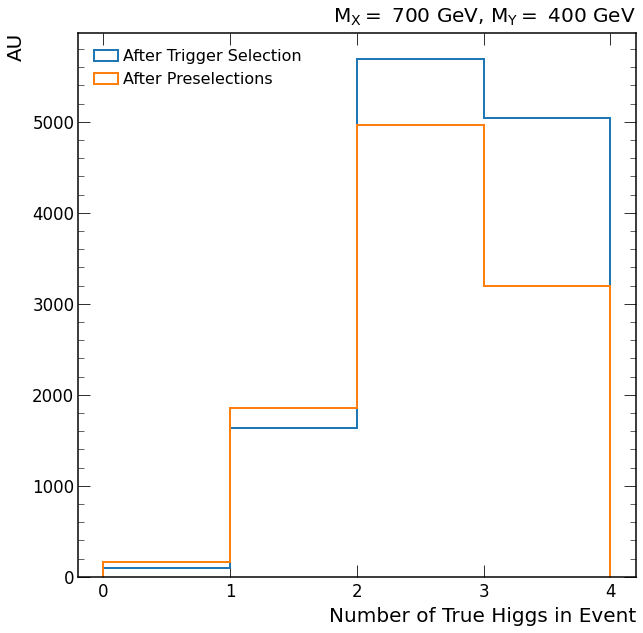

In [62]:
fig, ax = plt.subplots(figsize=(10,10))

trigger.hist(n_h_trigger, bins=np.arange(0,5), ax=ax, label='After Trigger Selections')
presel.hist(n_h_presel, bins=np.arange(0,5), ax=ax, label='After Preselections')

ax.set_xlabel('Number of True Higgs in Event')

ax.legend(loc=2)

In [48]:
bias = Signal(f_bias)
print(bias.cutflow)
print(bias.nevents)

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root
[17922 12611 10180  7332]
40300


In [143]:
sixb_in_presel = ak.sum(np.column_stack(((bias.HX_b1_genHflag > -1), (bias.HX_b2_genHflag > -1), (bias.H1_b1_genHflag > -1), (bias.H1_b2_genHflag > -1), (bias.H2_b1_genHflag > -1), (bias.H2_b2_genHflag > -1))), axis=1) == 6

genHflag_selection = np.column_stack((bias.HX_b1_genHflag, bias.HX_b2_genHflag, bias.H1_b1_genHflag, bias.H1_b2_genHflag, bias.H2_b1_genHflag, bias.H2_b2_genHflag))

HX_in_selection = ak.sum(genHflag_selection == 0, axis=1) == 2
H1_in_selection = ak.sum(genHflag_selection == 1, axis=1) == 2
H2_in_selection = ak.sum(genHflag_selection == 2, axis=1) == 2

In [147]:
nH_in_selection = np.sum(np.column_stack((HX_in_selection, H1_in_selection, H2_in_selection)), axis=1)

In [95]:
HX_found = (bias.HX_b1_genHflag == 0) & (bias.HX_b2_genHflag == 0)
H1_found = (bias.H1_b1_genHflag == 1) & (bias.H1_b2_genHflag == 1)
H2_found = (bias.H2_b1_genHflag == 2) & (bias.H2_b2_genHflag == 2)

In [ ]:
n_H = np.sum(np.column_stack((HX_found.to_numpy(), H1_found.to_numpy(), H2_found.to_numpy())), axis=1)

In [159]:
HX_in_selection, HX_found

(<Array [True, True, True, ... True, True, True] type='40300 * bool'>,
 <Array [True, False, False, ... False, False] type='40300 * bool'>)

In [164]:
HX_acc = ak.sum(HX_found) / ak.sum(HX_in_selection)
H1_acc = ak.sum(H1_found) / ak.sum(H1_in_selection)
H2_acc = ak.sum(H2_found) / ak.sum(H2_in_selection)

<BarContainer object of 3 artists>

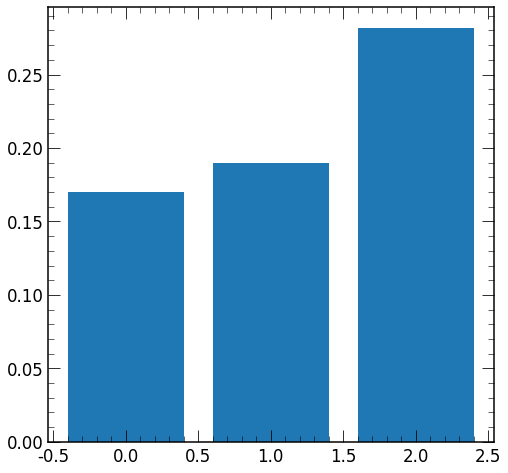

In [165]:
fig, ax = plt.subplots()

ax.bar(np.arange(3), height=[HX_acc, H1_acc, H2_acc])

(0.0, 6000.0)

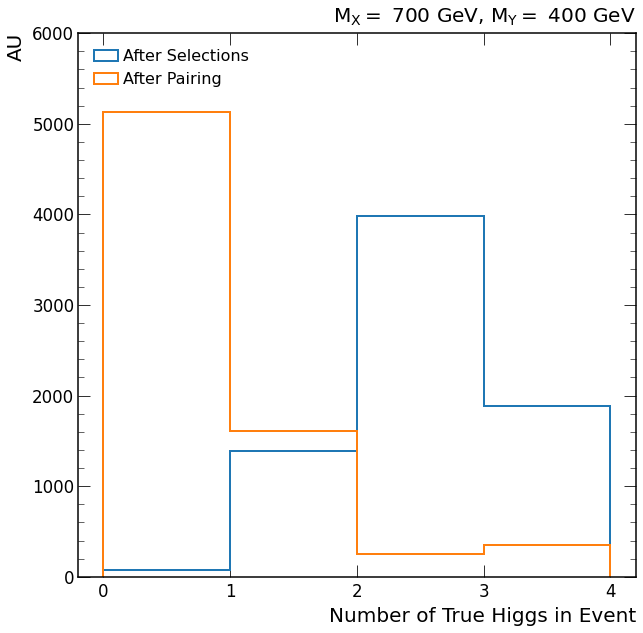

In [182]:
fig, ax = plt.subplots(figsize=(10,10))

# trigger.hist(n_h_trigger, bins=np.arange(0,5), ax=ax, label='After Trigger Selections')
# presel.hist(bias.nfound_presel_h, bins=np.arange(0,5), ax=ax, label='After Preselections')
presel.hist(nH_in_selection, bins=np.arange(0,5), ax=ax, label='After Selections')
presel.hist(n_H, bins=np.arange(0,5), ax=ax, label='After Pairing')
# presel.hist(n_H[sixb_in_presel], bins=np.arange(0,5), ax=ax, label='After Pairing')

ax.set_xlabel('Number of True Higgs in Event')

ax.legend(loc=2)
ax.set_ylim(0, 6000)

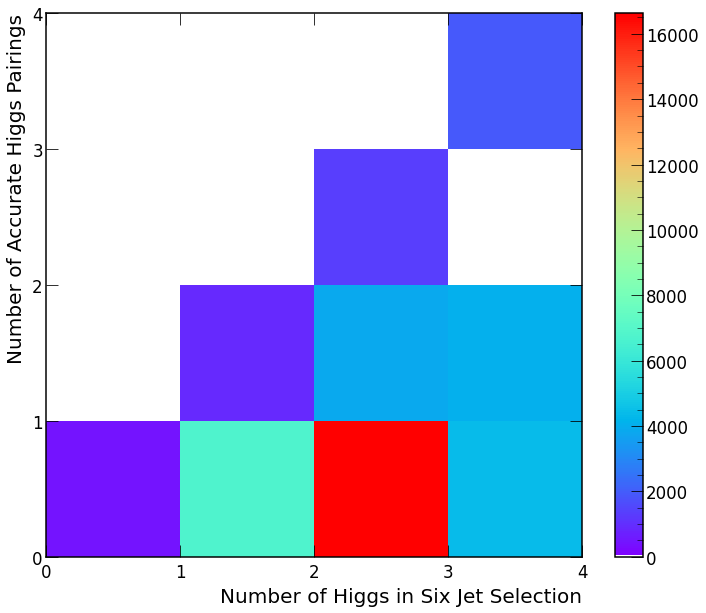

In [157]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(nH_in_selection, n_H, bins=np.arange(5), ax=ax)

# trigger.hist(n_h_trigger, bins=np.arange(0,5), ax=ax, label='After Trigger Selections')
# presel.hist(n_h_presel, bins=np.arange(0,5), ax=ax, label='After Preselections')
# presel.hist(n_H, bins=np.arange(0,5), ax=ax, label='After Pairing')

ax.set_xlabel('Number of Higgs in Six Jet Selection')
ax.set_ylabel('Number of Accurate Higgs Pairings')

ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))

ax.minorticks_off()

fig.colorbar(im, ax=ax)

# ax.legend(loc=2)
# ax.set_ylim(0, 6000)

In [19]:
def mpoint_title(MX=700, MY=400):
    return rf"$M_X = {MX}$ GeV, $M_Y = {MY}$ GeV"

In [22]:
trees = [nocuts, trigger, presel, bias]
selection_labels = ['No Selections Applied', 'Trigger Selections Applied', 'Preselections Applied', 'Jet Selections and Pairing Applied']
def jet_var(H, b):
    return f'gen_H{H}_b{b}_recojet_ptRegressed'


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


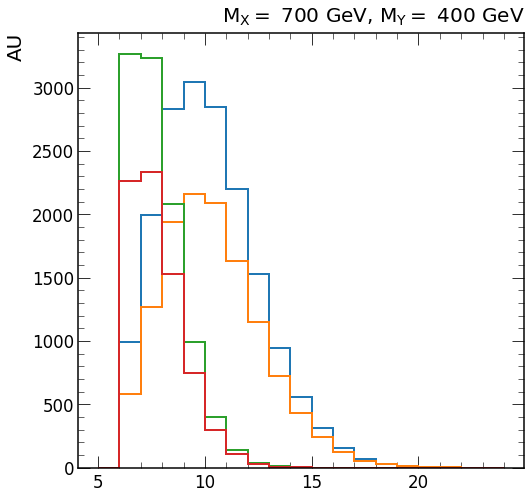

In [32]:
fig, ax = plt.subplots()

for tree,label in zip(trees,selection_labels):
    _ = tree.hist('n_jet', bins=njet_bins, ax=ax, label=label)

Text(1.0, 1.0, '$M_X = 700$ GeV, $M_Y = 400$ GeV')

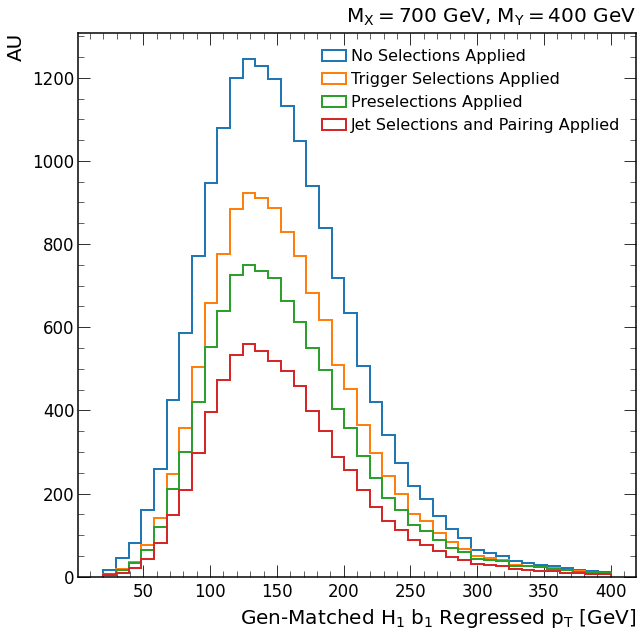

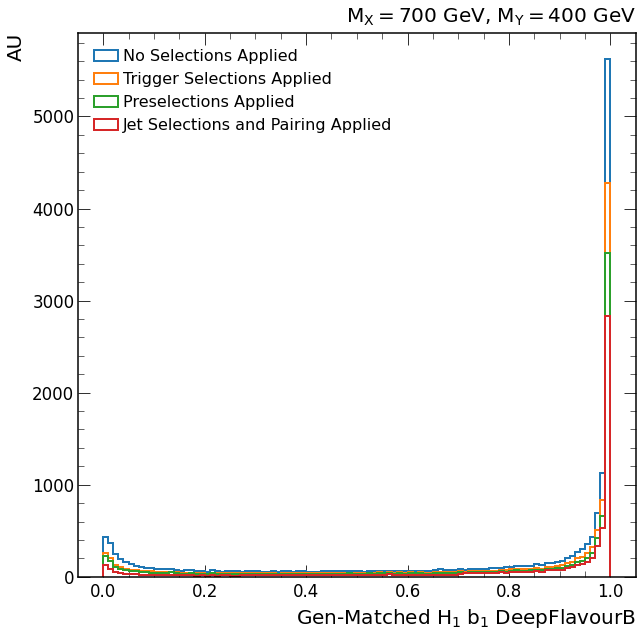

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

for tree,label in zip(trees,selection_labels):
    _ = Hist(tree.gen_H1_b1_recojet_ptRegressed, bins=pt_bins(400), ax=ax, label=label, weights=tree.scale)

ax.set_xlabel(r"Gen-Matched $H_1 \; b_1$ Regressed $p_T$ [GeV]")
ax.set_ylabel('AU')

# fig.suptitle("Effects of Analysis Selections")
ax.set_title(mpoint_title())

fig, ax = plt.subplots(figsize=(10,10))

for tree,label in zip(trees,selection_labels):
    _ = Hist(tree.gen_H1_b1_recojet_btag, bins=score_bins, ax=ax, label=label, weights=tree.scale)

ax.legend(loc=2)

ax.set_xlabel(r"Gen-Matched $H_1 \; b_1$ DeepFlavourB")
ax.set_ylabel('AU')

# ax.set_title("Effects of Analysis Selections")
ax.set_title(mpoint_title())

Text(1.0, 1.0, '$M_X = 700$ GeV, $M_Y = 400$ GeV')

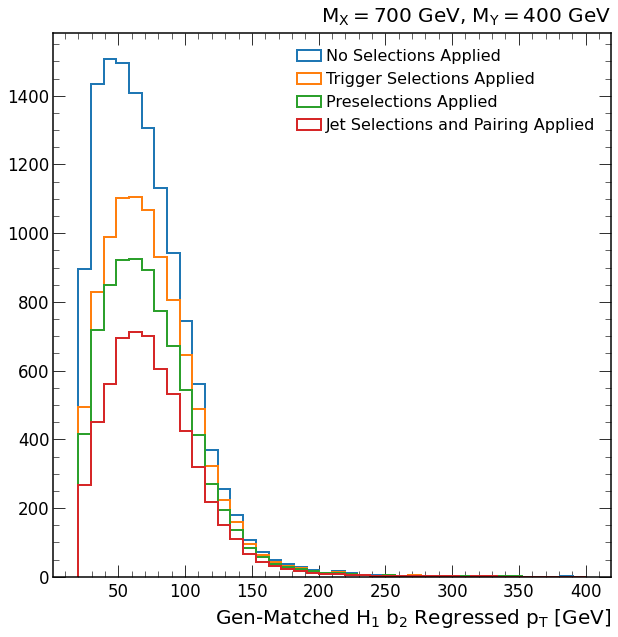

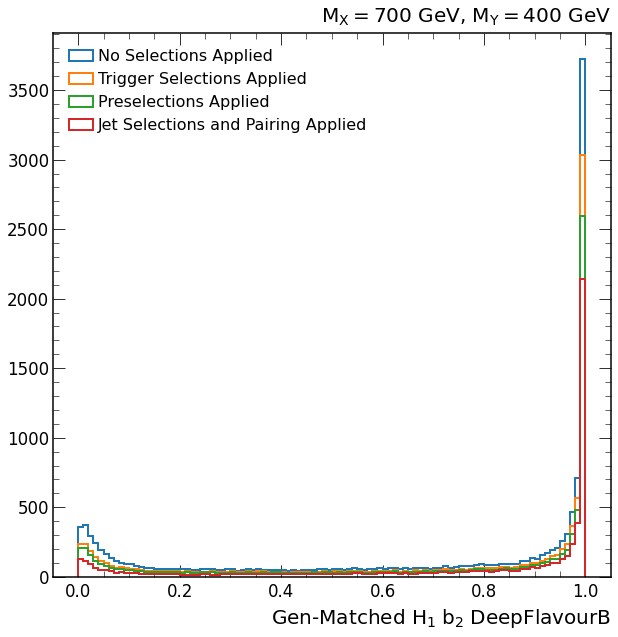

In [36]:
fig, ax = plt.subplots(figsize=(10,10))

for tree,label in zip(trees,selection_labels):
    _ = Hist(tree.gen_H1_b2_recojet_ptRegressed, bins=pt_bins(400), ax=ax, label=label, weights=tree.scale)

ax.set_xlabel(r"Gen-Matched $H_1 \; b_2$ Regressed $p_T$ [GeV]")

# fig.suptitle("Effects of Analysis Selections")
ax.set_title(mpoint_title())

fig, ax = plt.subplots(figsize=(10,10))

for tree,label in zip(trees,selection_labels):
    _ = Hist(tree.gen_H1_b2_recojet_btag, bins=score_bins, ax=ax, label=label, weights=tree.scale)

ax.legend(loc=2)

ax.set_xlabel(r"Gen-Matched $H_1 \; b_2$ DeepFlavourB")

# ax.set_title("Effects of Analysis Selections")
ax.set_title(mpoint_title())

In [26]:
bias.sample

'$M_X=$ 700 GeV, $M_Y=$ 400 GeV'

Text(1, 0, '$p_T$ [GeV]')

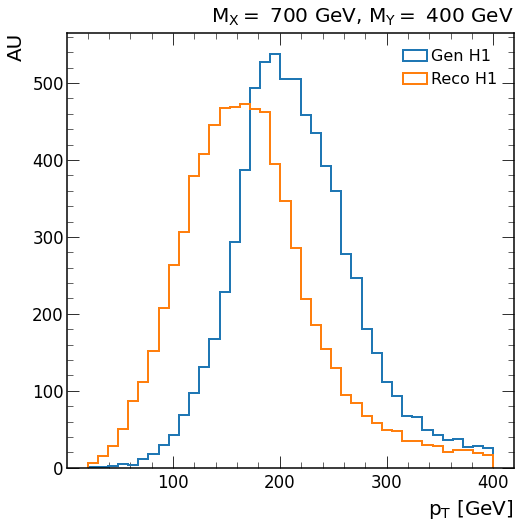

In [27]:
fig, ax = plt.subplots()

ax = bias.hist(['gen_H1_pt','H1_pt'], bins=pt_bins(400), ax=ax, label=['Gen H1', 'Reco H1'])

ax.set_xlabel(r"$p_T$ [GeV]")
# ax.set_title(mpoint_title())

True

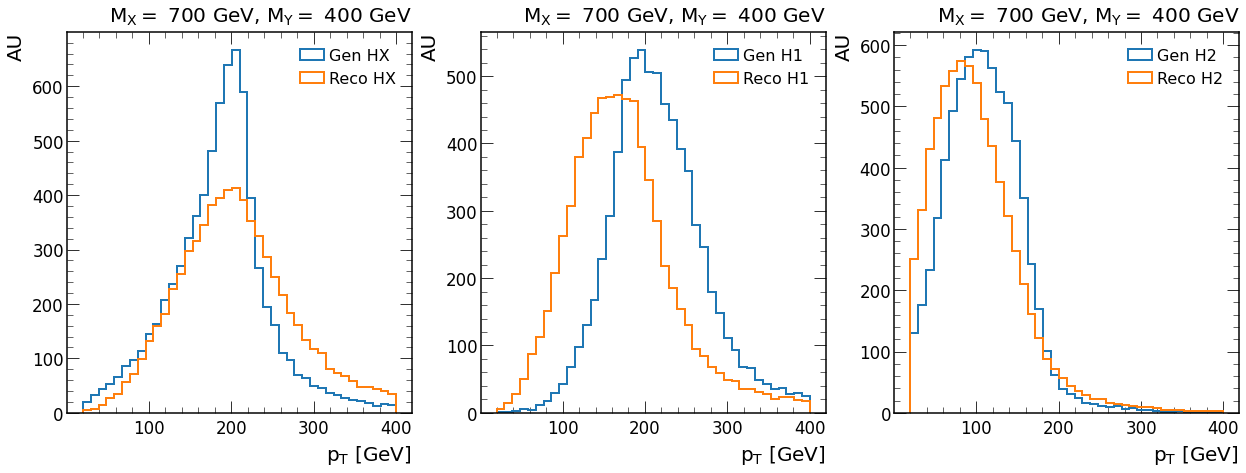

In [28]:
fig, axs = plt.subplots(ncols=3, figsize=(21,7))

bias.hist(['gen_HX_pt','HX_pt'], bins=pt_bins(400), ax=axs[0], label=['Gen HX', 'Reco HX'])#, title=False)
axs[0].set_xlabel(r"$p_T$ [GeV]")
bias.hist(['gen_H1_pt','H1_pt'], bins=pt_bins(400), ax=axs[1], label=['Gen H1', 'Reco H1'])#, title=False)
axs[1].set_xlabel(r"$p_T$ [GeV]")
bias.hist(['gen_H2_pt','H2_pt'], bins=pt_bins(400), ax=axs[2], label=['Gen H2', 'Reco H2'])#, title=False)
axs[2].set_xlabel(r"$p_T$ [GeV]")

ak.all(bias.gen_H1_pt >= bias.gen_H2_pt)

Text(1, 0, '$p_T$ [GeV]')

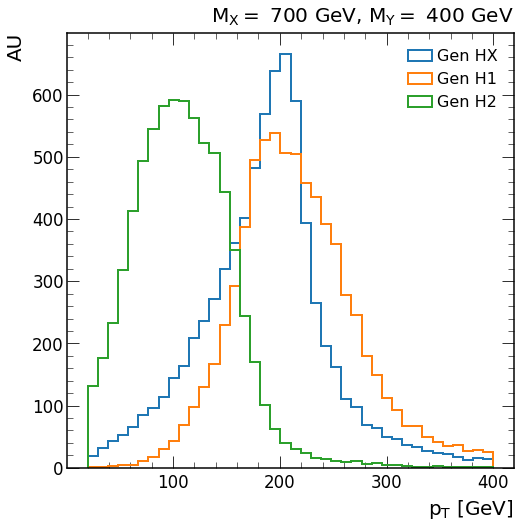

In [29]:
fig, ax = plt.subplots()

bias.hist(['gen_HX_pt', 'gen_H1_pt', 'gen_H2_pt'], bins=pt_bins(400), ax=ax, label=['Gen HX', 'Gen H1', 'Gen H2'])

ax.set_xlabel(r"$p_T$ [GeV]")

# _ = Hist(bias.gen_HX_pt, bins=pt_bins(400), ax=ax)
# _ = Hist(bias.gen_H1_pt, bins=pt_bins(400), ax=ax)
# _ = Hist(bias.gen_H2_pt, bins=pt_bins(400), ax=ax)

Text(1, 0, '$p_T$ [GeV]')

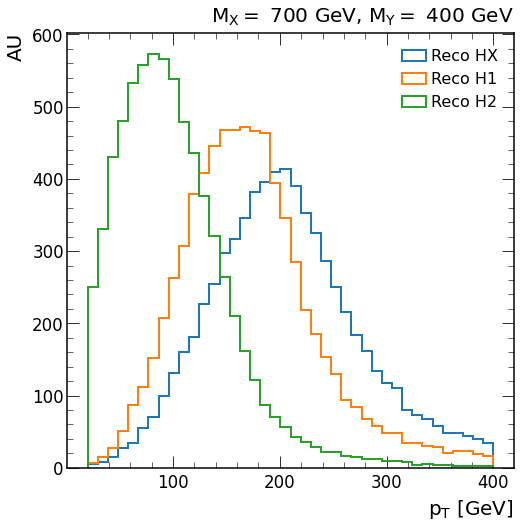

In [30]:
fig, ax = plt.subplots()

bias.hist(['HX_pt', 'H1_pt', 'H2_pt'], bins=pt_bins(400), ax=ax, label=['Reco HX', 'Reco H1', 'Reco H2'])

ax.set_xlabel(r"$p_T$ [GeV]")

Text(1.0, 1.0, '$M_X = 700$ GeV, $M_Y = 400$ GeV')

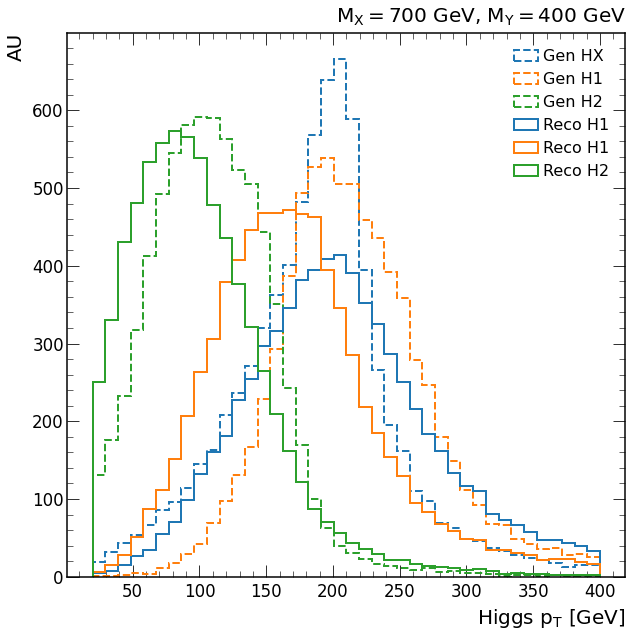

In [31]:
fig, ax = plt.subplots(figsize=(10,10))

var_list = ['gen_HX_pt', 'gen_H1_pt', 'gen_H2_pt', 'HX_pt', 'H1_pt', 'H2_pt']
labels = ['Gen HX', 'Gen H1', 'Gen H2', 'Reco H1', 'Reco H1', 'Reco H2']
colors = ['C0', 'C1', 'C2', 'C0', 'C1', 'C2']
styles = ['--', '--', '--', '-', '-', '-']
bias.hist(var_list, bins=pt_bins(400), ax=ax, label=labels, colors=colors, styles=styles)

ax.set_xlabel(r'Higgs $p_T$ [GeV]')

ax.set_title(r"$M_X = 700$ GeV, $M_Y = 400$ GeV")

Text(1.0, 1.0, '$M_X = 700$ GeV, $M_Y = 400$ GeV')

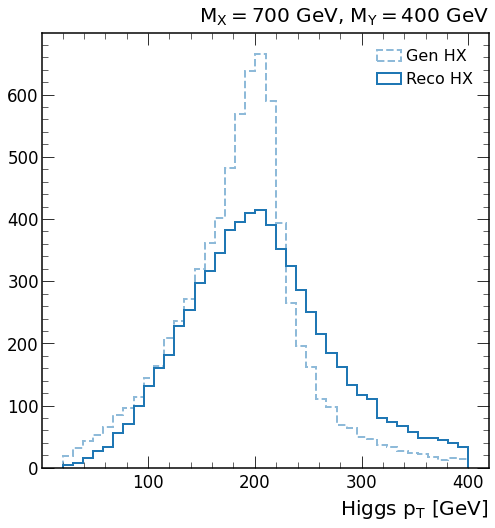

In [32]:
fig, ax = plt.subplots()

_ = Hist(bias.gen_HX_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen HX', color='C0', linestyle='--', alpha=0.5, weights=bias.scale)
# _ = Hist(bias.gen_H1_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen H1', color='C1', linestyle='--', alpha=0.5, weights=bias.scale)
# _ = Hist(bias.gen_H2_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen H2', color='C2', linestyle='--', alpha=0.5, weights=bias.scale)
_ = Hist(bias.HX_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco HX', color='C0', weights=bias.scale)
# _ = Hist(bias.H1_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco H1', color='C1', weights=bias.scale)
# _ = Hist(bias.H2_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco H2', color='C2', weights=bias.scale)

ax.set_xlabel(r'Higgs $p_T$ [GeV]')

ax.set_title(r"$M_X = 700$ GeV, $M_Y = 400$ GeV")

Text(1.0, 1.0, '$M_X = 700$ GeV, $M_Y = 400$ GeV')

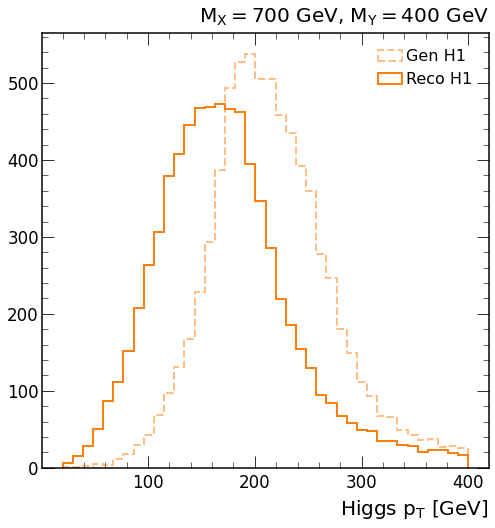

In [40]:
fig, ax = plt.subplots()

# _ = Hist(bias.gen_HX_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen HX', color='C0', linestyle='--', alpha=0.5, weights=bias.scale)
_ = Hist(bias.gen_H1_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen H1', color='C1', linestyle='--', alpha=0.5, weights=bias.scale)
# _ = Hist(bias.gen_H2_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen H2', color='C2', linestyle='--', alpha=0.5, weights=bias.scale)
# _ = Hist(bias.HX_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco HX', color='C0', weights=bias.scale)
_ = Hist(bias.H1_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco H1', color='C1', weights=bias.scale)
# _ = Hist(bias.H2_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco H2', color='C2', weights=bias.scale)

ax.set_xlabel(r'Higgs $p_T$ [GeV]')

ax.set_title(r"$M_X = 700$ GeV, $M_Y = 400$ GeV")

Text(1.0, 1.0, '$M_X = 700$ GeV, $M_Y = 400$ GeV')

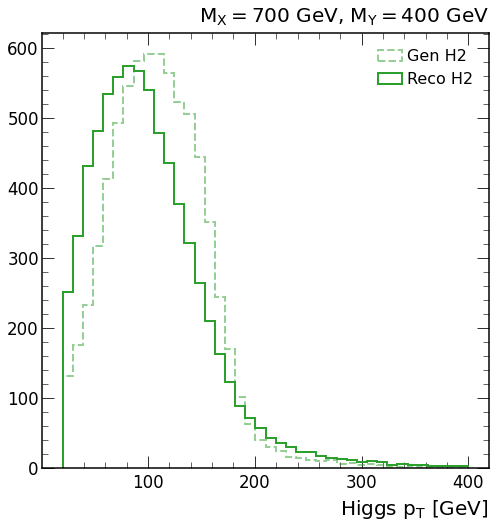

In [34]:
fig, ax = plt.subplots()

# _ = Hist(bias.gen_HX_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen HX', color='C0', linestyle='--', alpha=0.5, weights=bias.scale)
# _ = Hist(bias.gen_H1_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen H1', color='C1', linestyle='--', alpha=0.5, weights=bias.scale)
_ = Hist(bias.gen_H2_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Gen H2', color='C2', linestyle='--', alpha=0.5, weights=bias.scale)
# _ = Hist(bias.HX_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco HX', color='C0', weights=bias.scale)
# _ = Hist(bias.H1_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco H1', color='C1', weights=bias.scale)
_ = Hist(bias.H2_pt, bins=pt_bins(400, nedges=41), ax=ax, label='Reco H2', color='C2', weights=bias.scale)

ax.set_xlabel(r'Higgs $p_T$ [GeV]')

ax.set_title(r"$M_X = 700$ GeV, $M_Y = 400$ GeV")

In [45]:
njet_bins = np.arange(5,25)

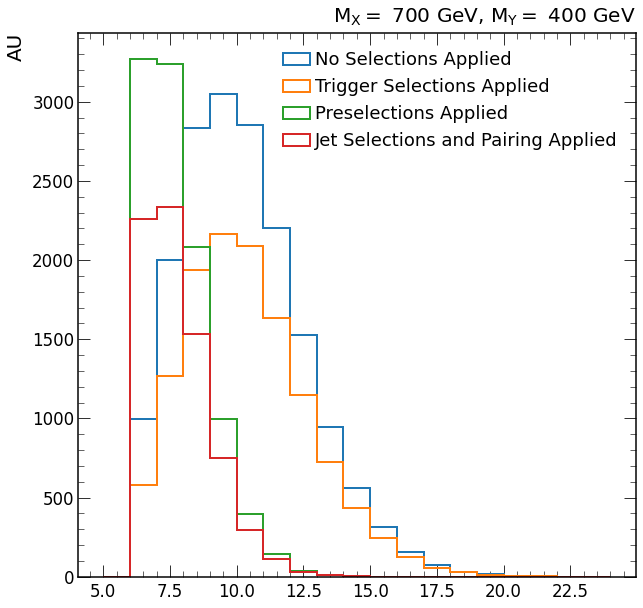

In [53]:
fig, ax = plt.subplots(figsize=(10,10))

for tree, label in zip(trees, selection_labels):
    tree.hist('n_jet', bins=njet_bins, ax=ax, label=label)

ax.legend(fontsize=18)

In [ ]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}$\times 10^{{{e:d}}}$'.format(m=m, e=int(e))

cf_labels=['Total','Trigger',r'$p_T>20$ GeV'+'\n6 jets', r'$|\eta|<2.5$'+'\n6 jets', 'Pass JetID\n6 jets', 'Pass PileupID\n6 jets', r'$p_T>60$ GeV'+'\n& Tight b-tag', r'$p_T>40$ GeV'+'\n& Tight b-tag', r'$p_T>40$ GeV'+'\n& Medium b-tag', r'$p_T>20$ GeV'+'\n& Medium b-tag', r'$p_T>20$ GeV'+'\n& Loose b-tag', r'$p_T>20$ GeV'+'\n& Loose b-tag']

cf_labels = cf_labels[::-1]

In [12]:
# PRESELECTIONS
pt_min = 30
eta_max = 2.5
jetID = 1
PUID = 1

def checkBit(id, cut):
    return id & (1 << cut)

In [50]:
n = 9
edges = np.linspace(0,1,n)
x = (edges[1:] + edges[:-1])/2
width = x[1]-x[0]

In [51]:
import uproot

In [52]:
# cutflows_sig_jets = []
cutflows = []

year = 2018
for sample in NMSSM_List_studies:
    mass_point = sample.split("/")[-2] # extract mass point for saving plots

    # open file
    f = uproot.open(sample)

    # extract info necessary for MC scale factor
    samp, xsec = next( ((key,value) for key,value in xsecMap.items() if key in sample),("unk",1) )
    lumi = lumiMap[year][0]
    total = f['h_cutflow'].to_numpy()[0][0]
    scale = lumi*xsec/total
    
    # create cutflow object
    cf = f['h_cutflow'].to_numpy()[0] * scale
    
    # open tree
    t = f['sixBtree']
    # signal_jets = t['jet_signalId'].array() > -1
    signal_jets = ak.local_index(t['jet_signalId'].array())
    
    # preselections
    pt_mask = t['jet_pt'].array()[signal_jets] > pt_min # pt selection
    eta_mask = abs(t['jet_eta'].array())[signal_jets] < eta_max # eta selection
    jetID_mask = checkBit(t['jet_id'].array(), jetID)[signal_jets] > 0 # JetID selection
    PUID_mask = checkBit(t['jet_puid'].array(), PUID)[signal_jets] > 0 # PUID selection

    jet_pt = t['jet_pt'].array()
    jet_btag = t['jet_btag'].array()
    padded_pt   = ak.pad_none(jet_pt[signal_jets],4,axis=1)
    padded_btag = ak.pad_none(jet_btag[signal_jets],4,axis=1)

    # six b selections
    tight_60  = (jet_pt > 60)[:,0] & (jet_btag > tight_b)[:,0] # first jet
    tight_40  = (jet_pt > 40)[:,1] & (jet_btag > tight_b)[:,1] # second jet
    medium_40 = (jet_pt > 40)[:,2] & (jet_btag > medium_b)[:,2] # third jet
    medium_20 = (jet_pt > 20)[:,3] & (jet_btag > medium_b)[:,3] # fourth jet
    loose_20_5 = (jet_pt > 20)[:,3] & (jet_btag > loose_b)[:,3] # fifth jet
    loose_20_6 = (jet_pt > 20)[:,4] & (jet_btag > loose_b)[:,4] # sixth jet

    # calculate cut flow amounts and append to cf
    pt_count = ak.sum(ak.sum(pt_mask, axis=1) > 5) * scale
    eta_count = ak.sum(ak.sum(pt_mask & eta_mask, axis=1) > 5) * scale
    jetID_count = ak.sum(ak.sum(pt_mask & eta_mask & jetID_mask, axis=1) > 5) * scale
    PUID_count = ak.sum(ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) * scale
    sel1_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60) * scale
    sel2_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40) * scale
    sel3_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40) * scale
    sel4_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40 & medium_20) * scale
    sel5_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40 & medium_20 & loose_20_5) * scale
    sel6_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40 & medium_20 & loose_20_5 & loose_20_6) * scale

    cf = np.append(cf, pt_count)
    cf = np.append(cf, eta_count)
    cf = np.append(cf, jetID_count)
    cf = np.append(cf, PUID_count)
    cf = np.append(cf, sel1_count)
    cf = np.append(cf, sel2_count)
    cf = np.append(cf, sel3_count)
    cf = np.append(cf, sel4_count)
    cf = np.append(cf, sel5_count)
    cf = np.append(cf, sel6_count)

    cutflows.append(cf)

    ncuts = len(cf)

In [53]:
sorted_2j_scores = ak.sort(t['dijet_2j_score'].array(), axis=1)[:,::-1]
sorted_id1 = t['dijet_id1'].array()[ak.argsort(t['dijet_2j_score'].array(), axis=1)[:,::-1]]
sorted_id2 = t['dijet_id2'].array()[ak.argsort(t['dijet_2j_score'].array(), axis=1)[:,::-1]]

In [54]:
sorted_2j_scores[0]

<Array [0.999, 0.998, ... 2.61e-07, 5.18e-09] type='55 * float32'>

In [55]:
first_score = ak.firsts(sorted_2j_scores).to_numpy()

In [56]:
first_choice = (sorted_id1 != ak.firsts(sorted_id1)) & (sorted_id2 != ak.firsts(sorted_id2))
scores_after_first_choice = sorted_2j_scores[first_choice]
id1_after_first_choice = sorted_id1[first_choice]
id2_after_first_choice = sorted_id2[first_choice]

In [57]:
second_score = ak.firsts(scores_after_first_choice).to_numpy()

In [58]:
second_choice = (id1_after_first_choice != ak.firsts(id1_after_first_choice)) & (id2_after_first_choice != ak.firsts(id2_after_first_choice))
scores_after_second_choice = scores_after_first_choice[second_choice]
id1_after_second_choice = id1_after_first_choice[second_choice]
id2_after_second_choice = id2_after_first_choice[second_choice]


In [59]:
third_score = ak.firsts(scores_after_second_choice).to_numpy()

In [60]:
score_3d = np.sqrt((first_score**2 + second_score**2 + third_score**2)/3)

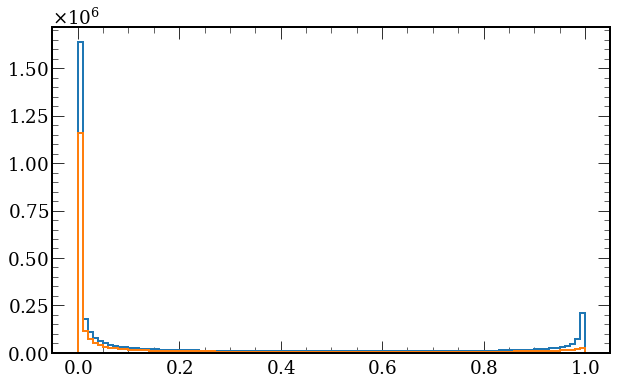

In [61]:

ax, n, b = Hist(ak.flatten(sorted_2j_scores), scale=1, bins=score_bins)
# fig, ax, n, b = Hist(ak.flatten(scores_after_first_choice), scale=1, bins=score_bins, fig=fig, ax=ax, density=1)
n, b = Hist(ak.flatten(scores_after_second_choice), scale=1, bins=score_bins, ax=ax)
# fig, ax, n, b = Hist(score_3d, scale=1, bins=score_bins, fig=fig, ax=ax, density=1)

In [62]:
ak.firsts(sorted_id2)

<Array [3, 1, 1, 3, 3, 3, ... 4, 3, 4, 9, 4, 2] type='68663 * ?float32'>

In [63]:
cutflows_sig_jets = []
# cutflows = []

year = 2018
for sample in NMSSM_List_studies:
    mass_point = sample.split("/")[-2] # extract mass point for saving plots

    # open file
    f = uproot.open(sample)

    # extract info necessary for MC scale factor
    samp, xsec = next( ((key,value) for key,value in xsecMap.items() if key in sample),("unk",1) )
    lumi = lumiMap[year][0]
    total = f['h_cutflow'].to_numpy()[0][0]
    scale = lumi*xsec/total
    
    # create cutflow object
    cf = f['h_cutflow'].to_numpy()[0] * scale
    
    # open tree
    t = f['sixBtree']
    signal_jets = t['jet_signalId'].array() > -1
    # signal_jets = ak.local_index(t['jet_signalId'].array())
    
    # preselections
    pt_mask = t['jet_pt'].array()[signal_jets] > pt_min # pt selection
    eta_mask = abs(t['jet_eta'].array())[signal_jets] < eta_max # eta selection
    jetID_mask = checkBit(t['jet_id'].array(), jetID)[signal_jets] > 0 # JetID selection
    PUID_mask = checkBit(t['jet_puid'].array(), PUID)[signal_jets] > 0 # PUID selection

    jet_pt = t['jet_pt'].array()
    jet_btag = t['jet_btag'].array()
    padded_pt   = ak.pad_none(jet_pt[signal_jets],6,axis=1)
    padded_btag = ak.pad_none(jet_btag[signal_jets],6,axis=1)

    # six b selections
    tight_60  = (padded_pt > 60)[:,0] & (padded_btag > tight_b)[:,0] # first jet
    tight_40  = (padded_pt > 40)[:,1] & (padded_btag > tight_b)[:,1] # second jet
    medium_40 = (padded_pt > 40)[:,2] & (padded_btag > medium_b)[:,2] # third jet
    medium_20 = (padded_pt > 20)[:,3] & (padded_btag > medium_b)[:,3] # fourth jet
    loose_20_5 = (padded_pt > 20)[:,3] & (padded_btag > loose_b)[:,3] # fifth jet
    loose_20_6 = (padded_pt > 20)[:,4] & (padded_btag > loose_b)[:,4] # sixth jet

    # calculate cut flow amounts and append to cf
    pt_count = ak.sum(ak.sum(pt_mask, axis=1) > 5) * scale
    eta_count = ak.sum(ak.sum(pt_mask & eta_mask, axis=1) > 5) * scale
    jetID_count = ak.sum(ak.sum(pt_mask & eta_mask & jetID_mask, axis=1) > 5) * scale
    PUID_count = ak.sum(ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) * scale
    sel1_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60) * scale
    sel2_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40) * scale
    sel3_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40) * scale
    sel4_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40 & medium_20) * scale

    sel5_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40 & medium_20 & loose_20_5) * scale
    sel6_count = ak.sum((ak.sum(pt_mask & eta_mask & jetID_mask & PUID_mask, axis=1) > 5) & tight_60 & tight_40 & medium_40 & medium_20 & loose_20_5 & loose_20_6) * scale

    cf = np.append(cf, pt_count)
    cf = np.append(cf, eta_count)
    cf = np.append(cf, jetID_count)
    cf = np.append(cf, PUID_count)
    cf = np.append(cf, sel1_count)
    cf = np.append(cf, sel2_count)
    cf = np.append(cf, sel3_count)
    cf = np.append(cf, sel4_count)
    cf = np.append(cf, sel5_count)
    cf = np.append(cf, sel6_count)

    cutflows_sig_jets.append(cf)

    ncuts = len(cf)

In [64]:
repeated_cutflows = np.repeat(np.asarray(cutflows_sig_jets), 3, axis=0)

In [65]:
repeated_cutflows[1::3] = np.asarray((repeated_cutflows[1::3] / repeated_cutflows[0::3][0][0] * 100),int)

In [66]:
for i,cutflow in enumerate(repeated_cutflows[2::3].copy()):
    for j,n in enumerate(cutflow[1:]):
        repeated_cutflows[2::3][i][j+1] = int(n/cutflow[j]*100)
    repeated_cutflows[2::3][i][0] = 100

In [67]:
repeated_cutflows[0::3] = np.asarray(repeated_cutflows[0::3], dtype=int)

In [68]:
repeated_cutflows = repeated_cutflows.T

In [69]:
df = pd.DataFrame(repeated_cutflows, index=cf_labels[::-1])

In [70]:
df.to_latex('cutflow_sig_jets.tex')

NameError: name 'NMSSM_List' is not defined

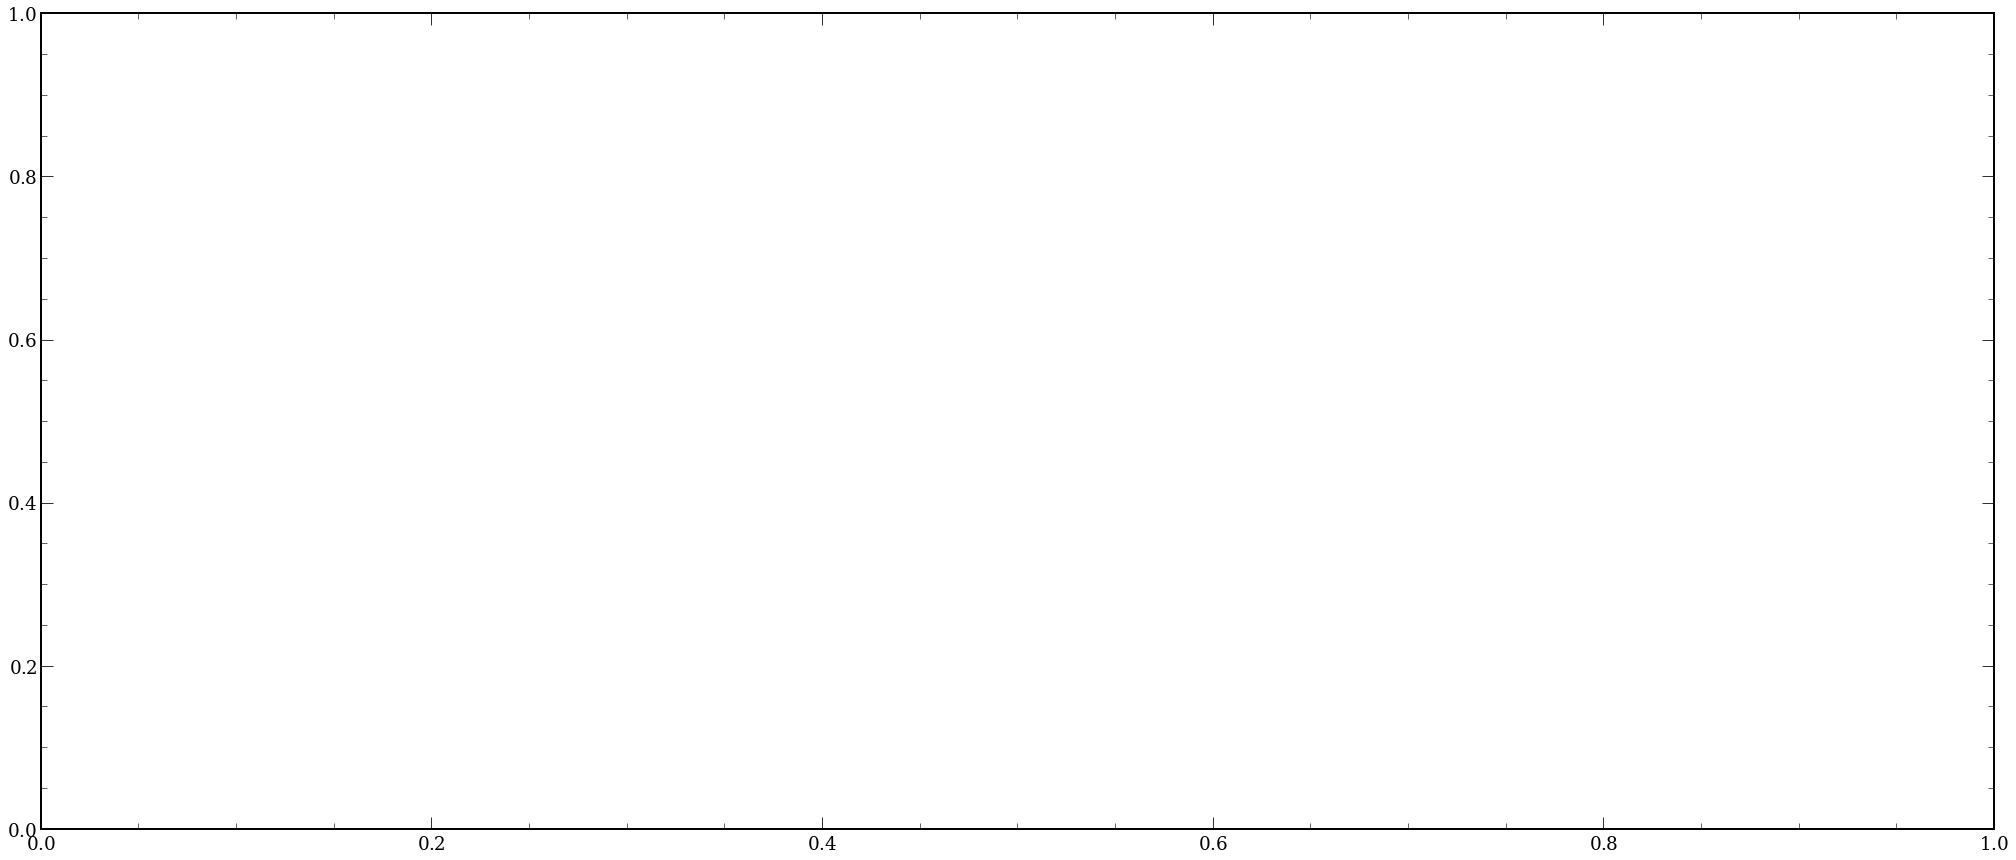

In [71]:
# make figure and axis objects
# fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2, gridspec_kw={'width_ratios':[2,1]}, sharey=True)
fig, ax = plt.subplots(figsize=(35,15))
offsets = x

year = 2018
for sample,offset,cutflow in zip(NMSSM_List,offsets,cutflows):
    mass_point = sample.split("/")[-2] # extract mass point for saving plots
    cf = cutflow
    total = cutflow[0]
    bar = ax.bar(x=np.arange(offset,ncuts+offset), height=cf/total, width=width, align='center', label=makeTitle(sample))
    ax.xaxis.set_tick_params(which='minor', bottom=False, top=False)
    ax.xaxis.set_tick_params(which='major', bottom=False, top=True)
    ax.set_xticks(np.arange(0,ncuts)+0.4)
    ax.set_xticklabels(cf_labels[::-1], ha='center')
    ax.set_ylabel('Events')
    ax.legend()

# ymin, ymax = ax.get_ylim()
# ax.set_ylim(1, ymax*50)

fig.savefig(f'plots/cutflow_efficiency_extra.pdf')

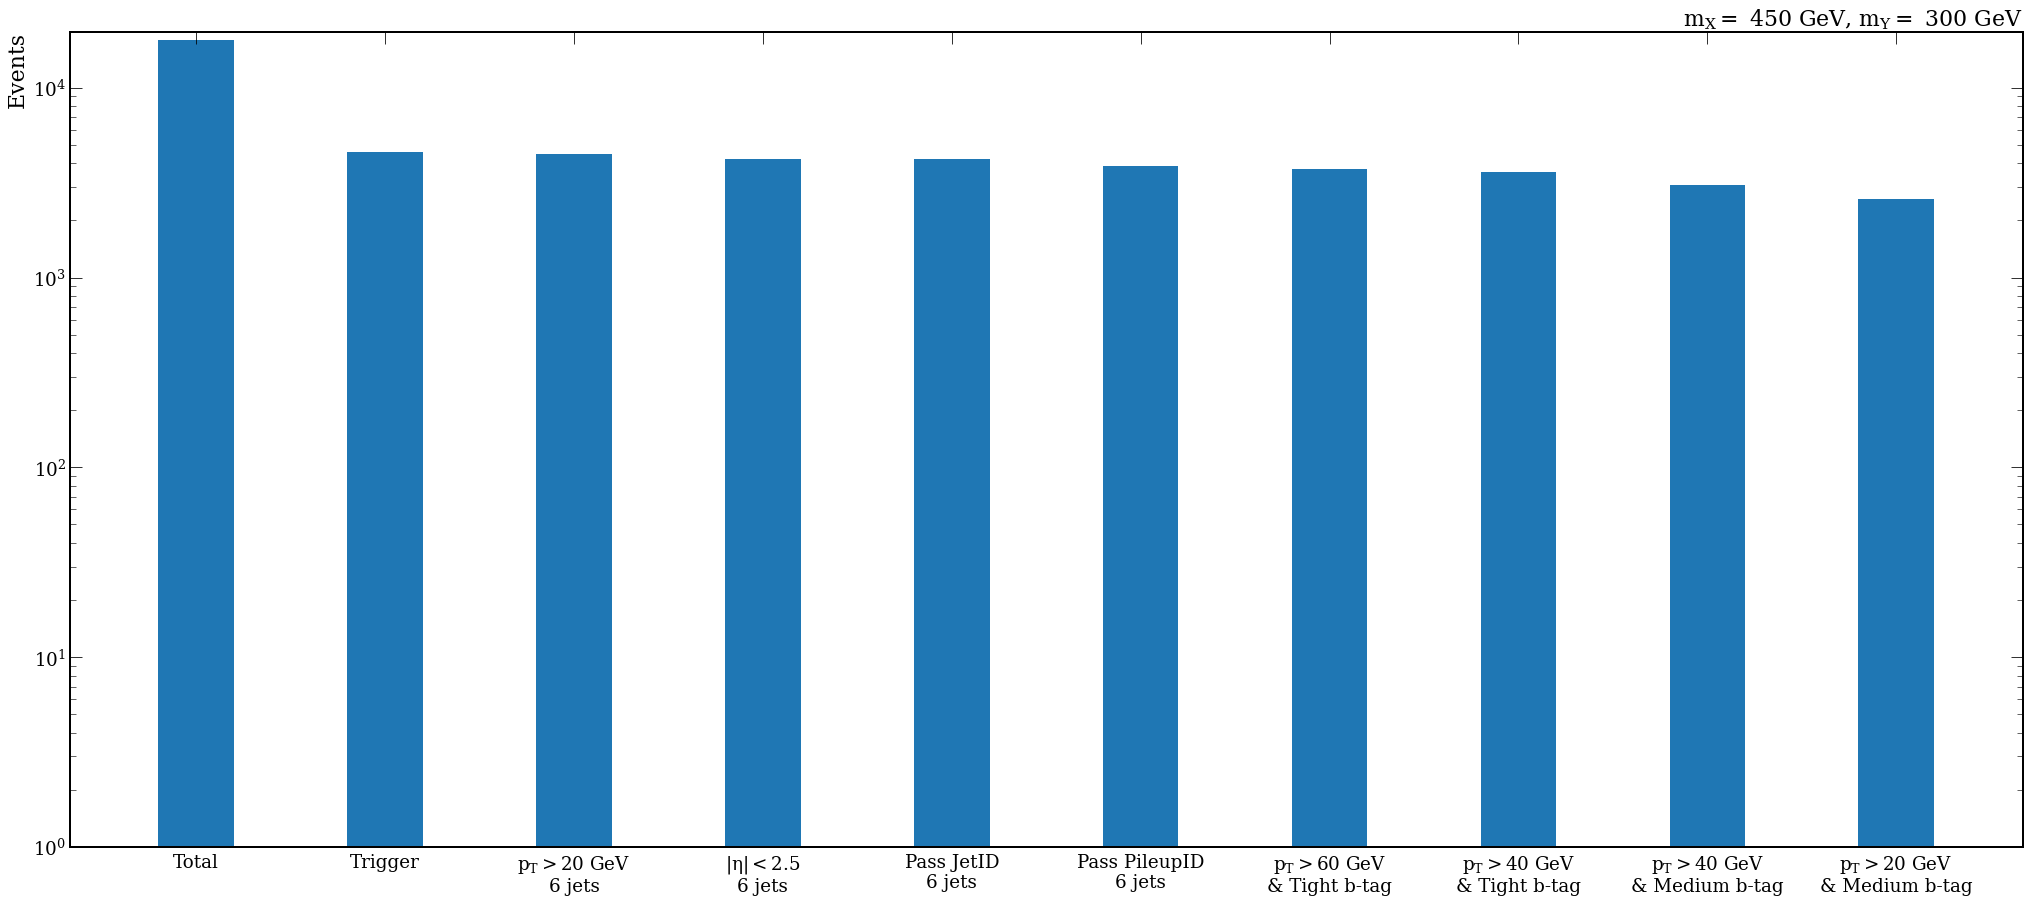

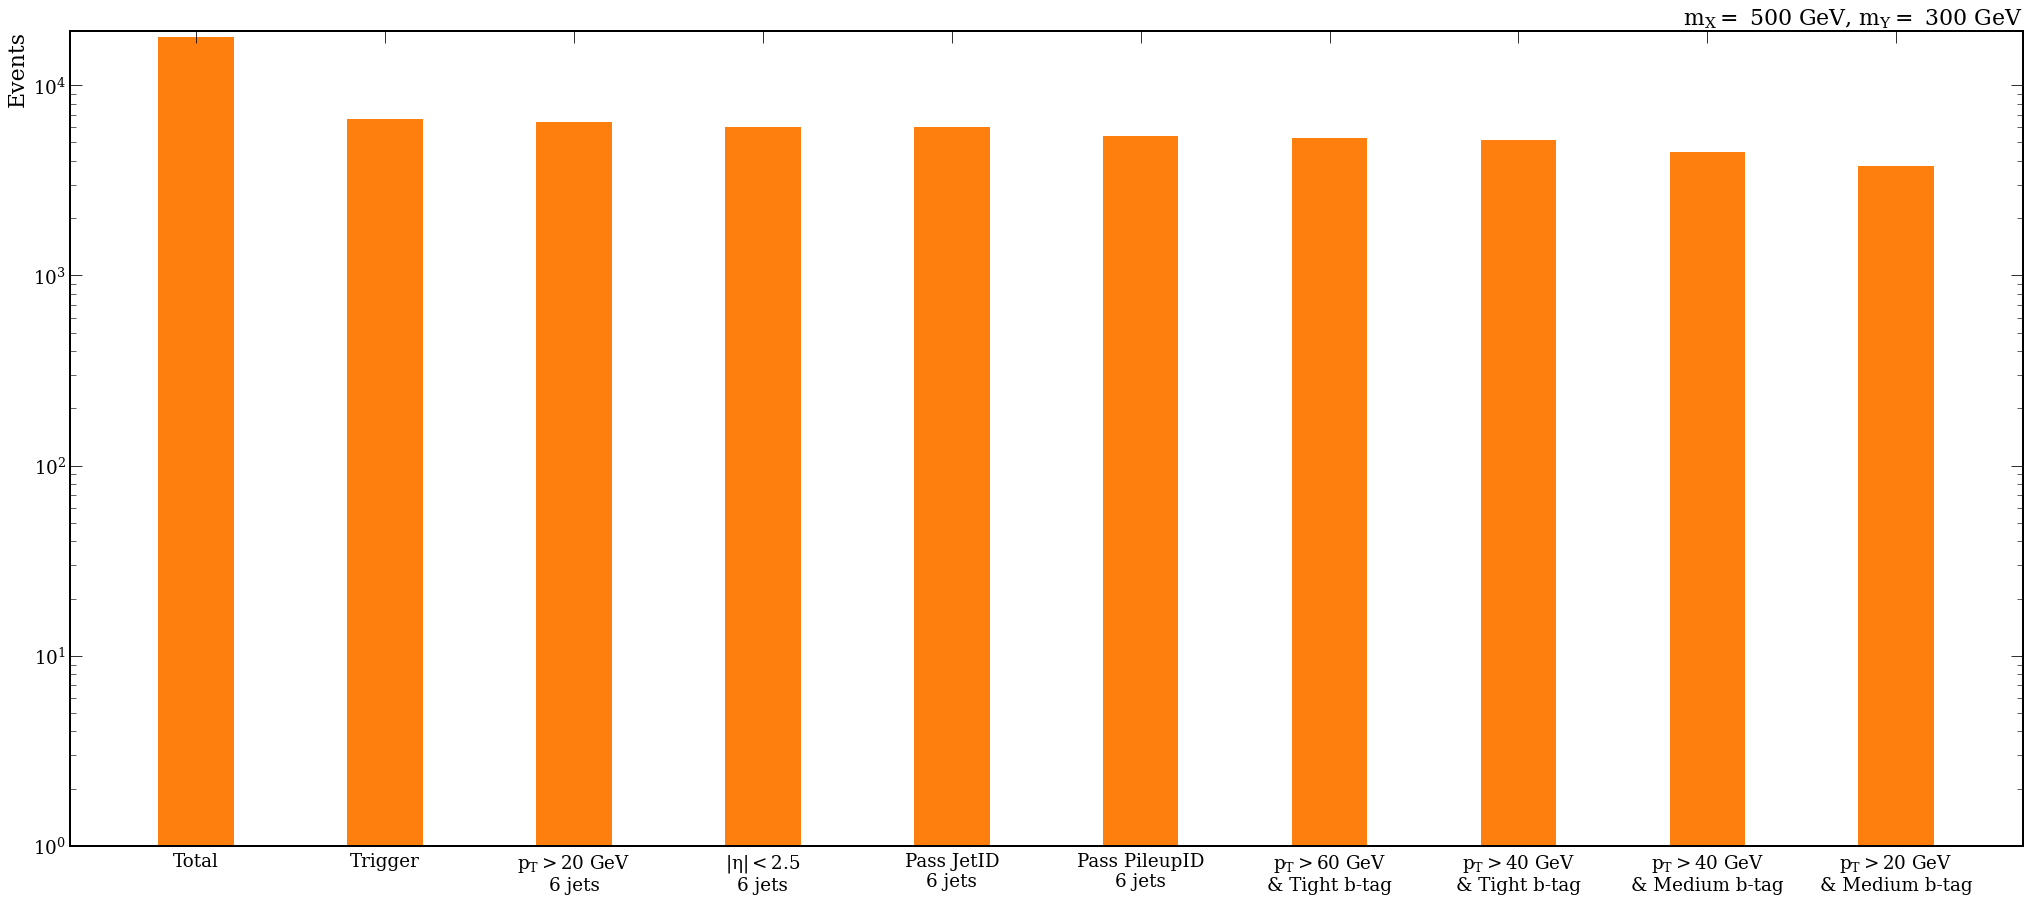

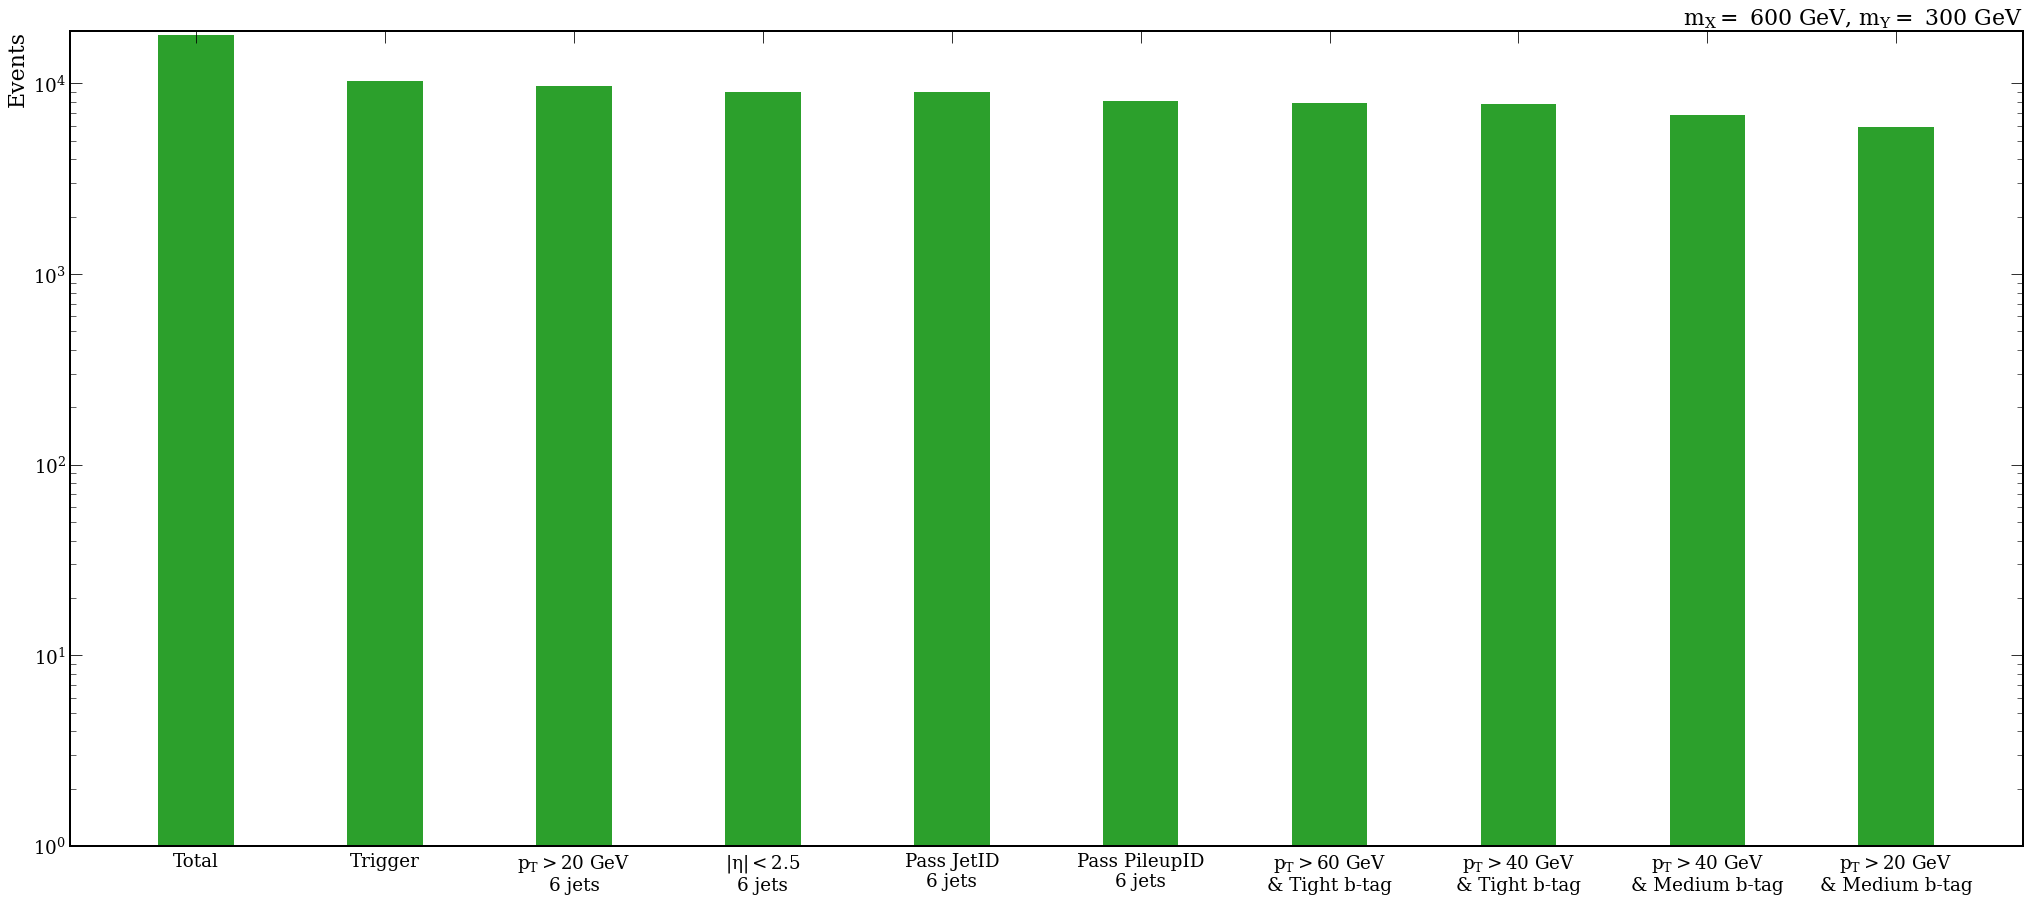

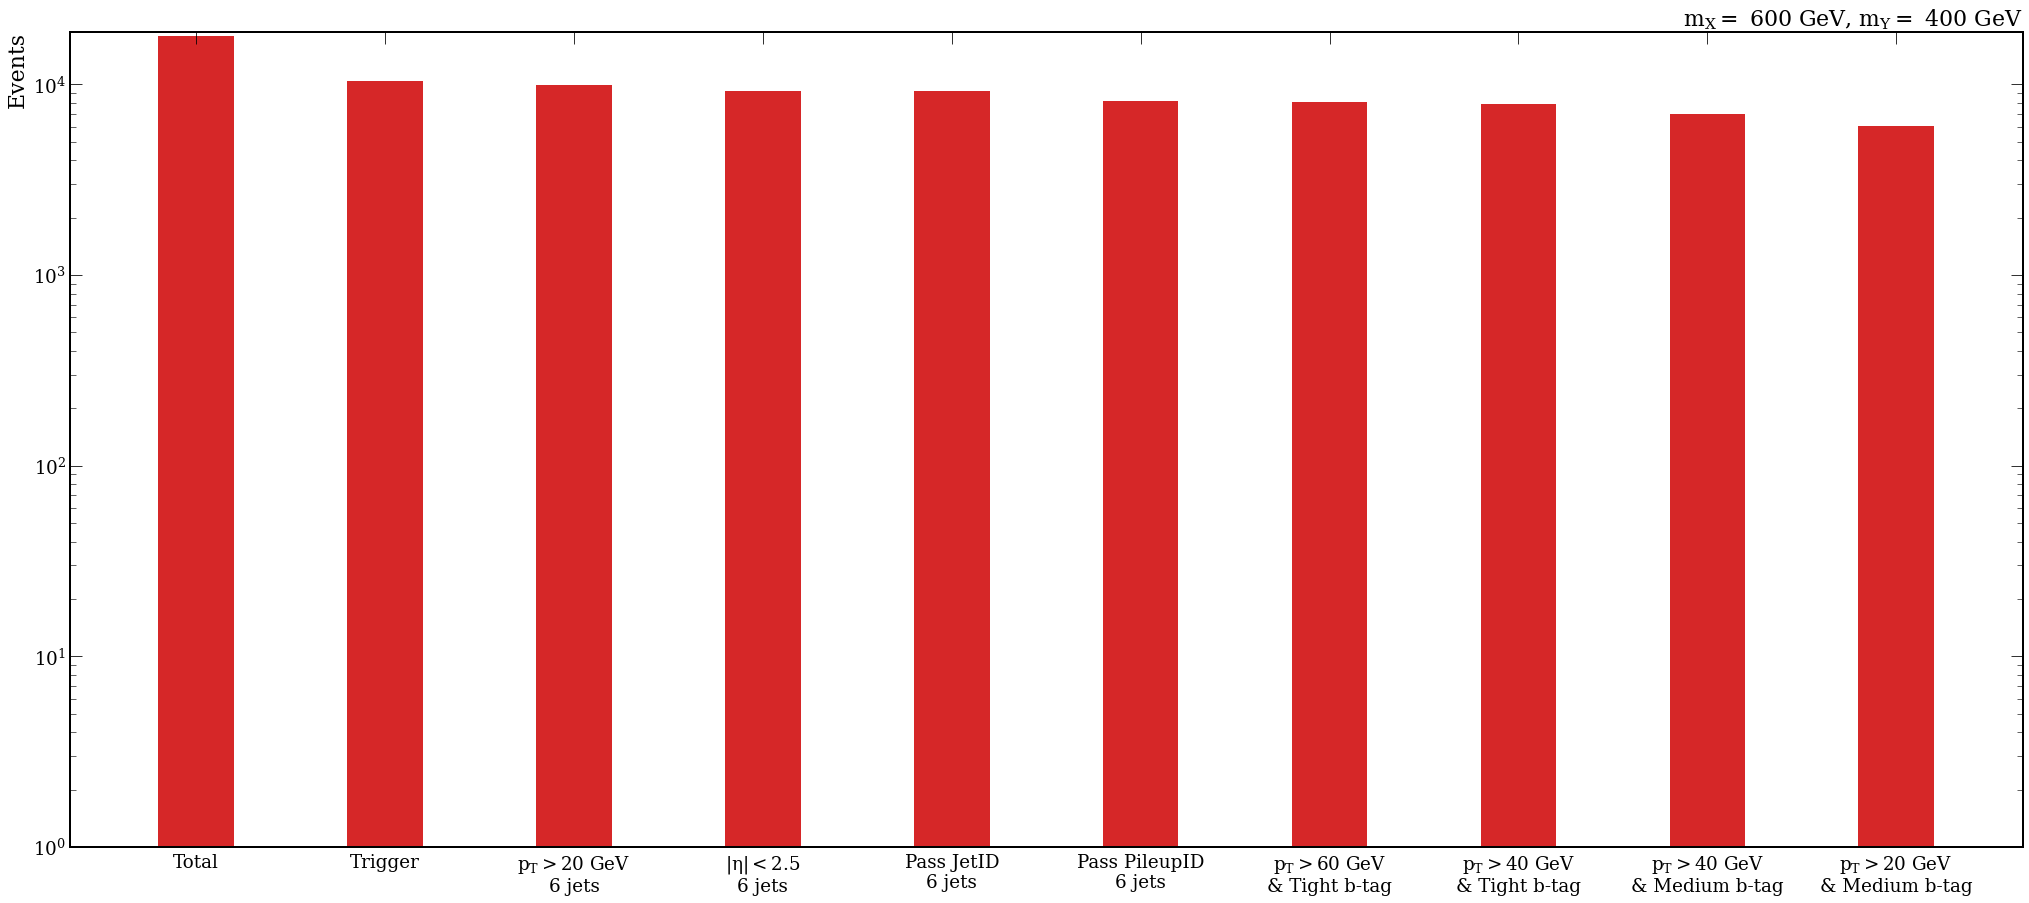

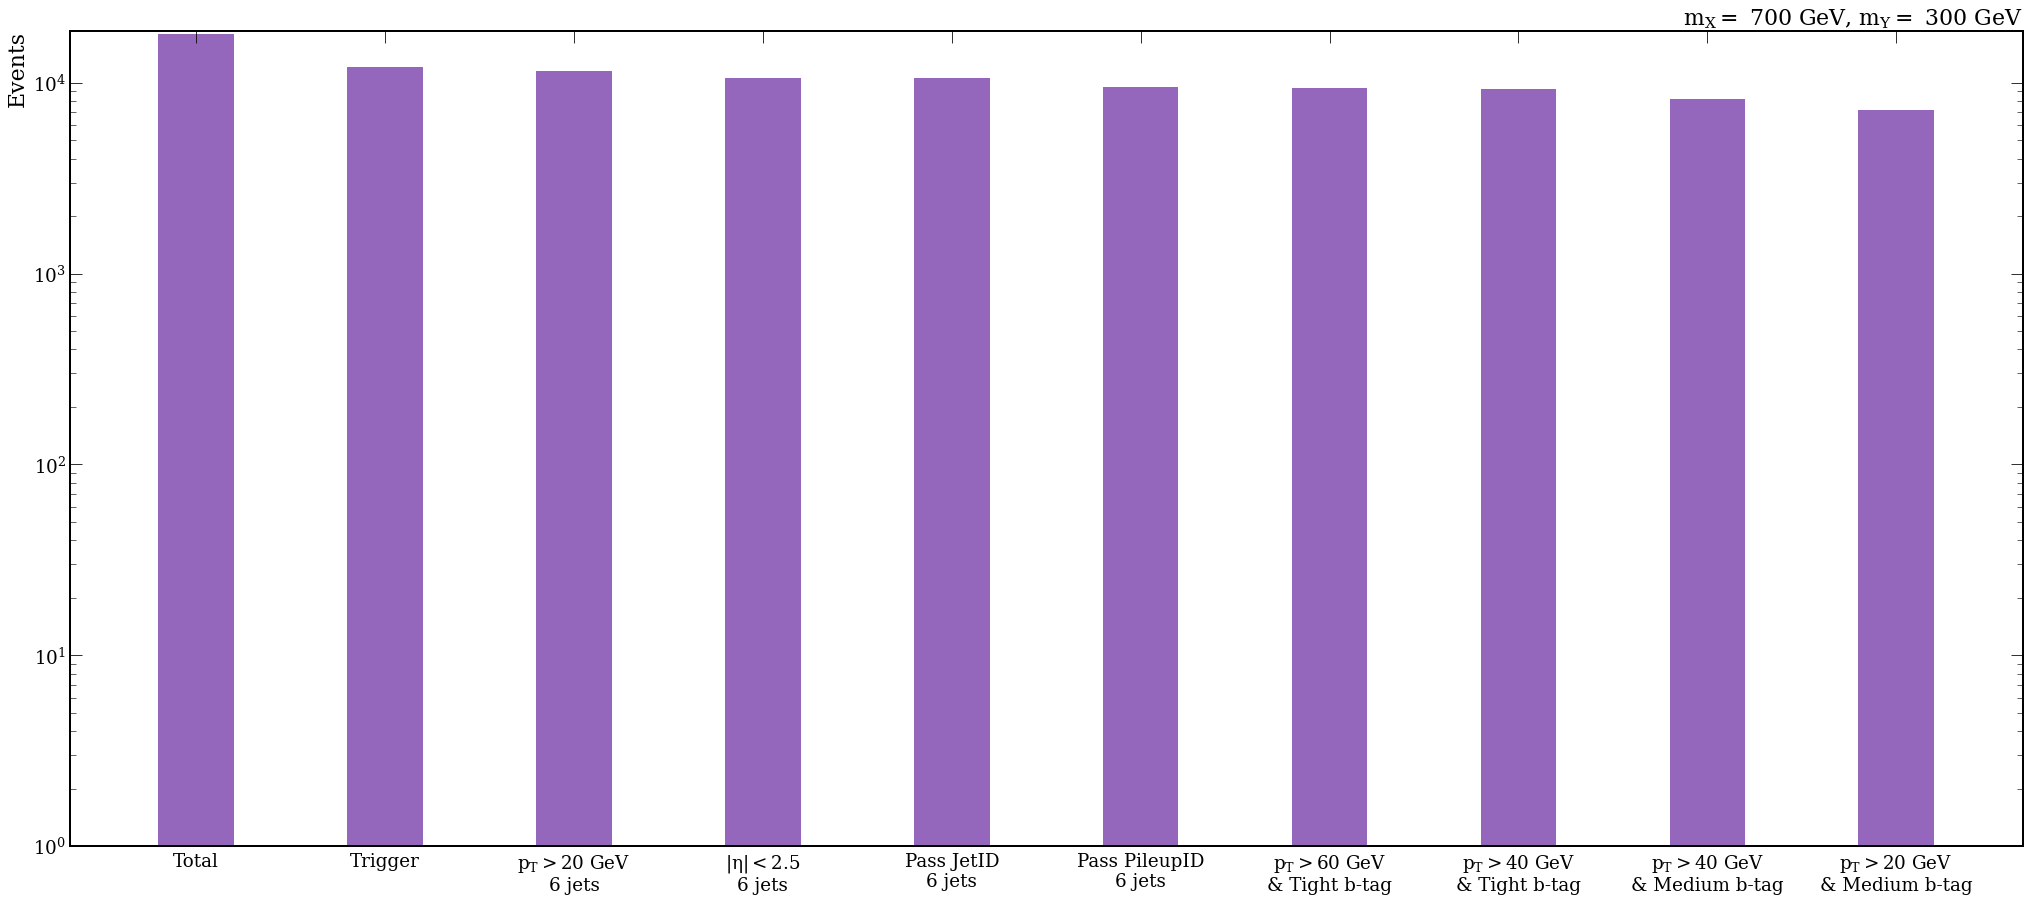

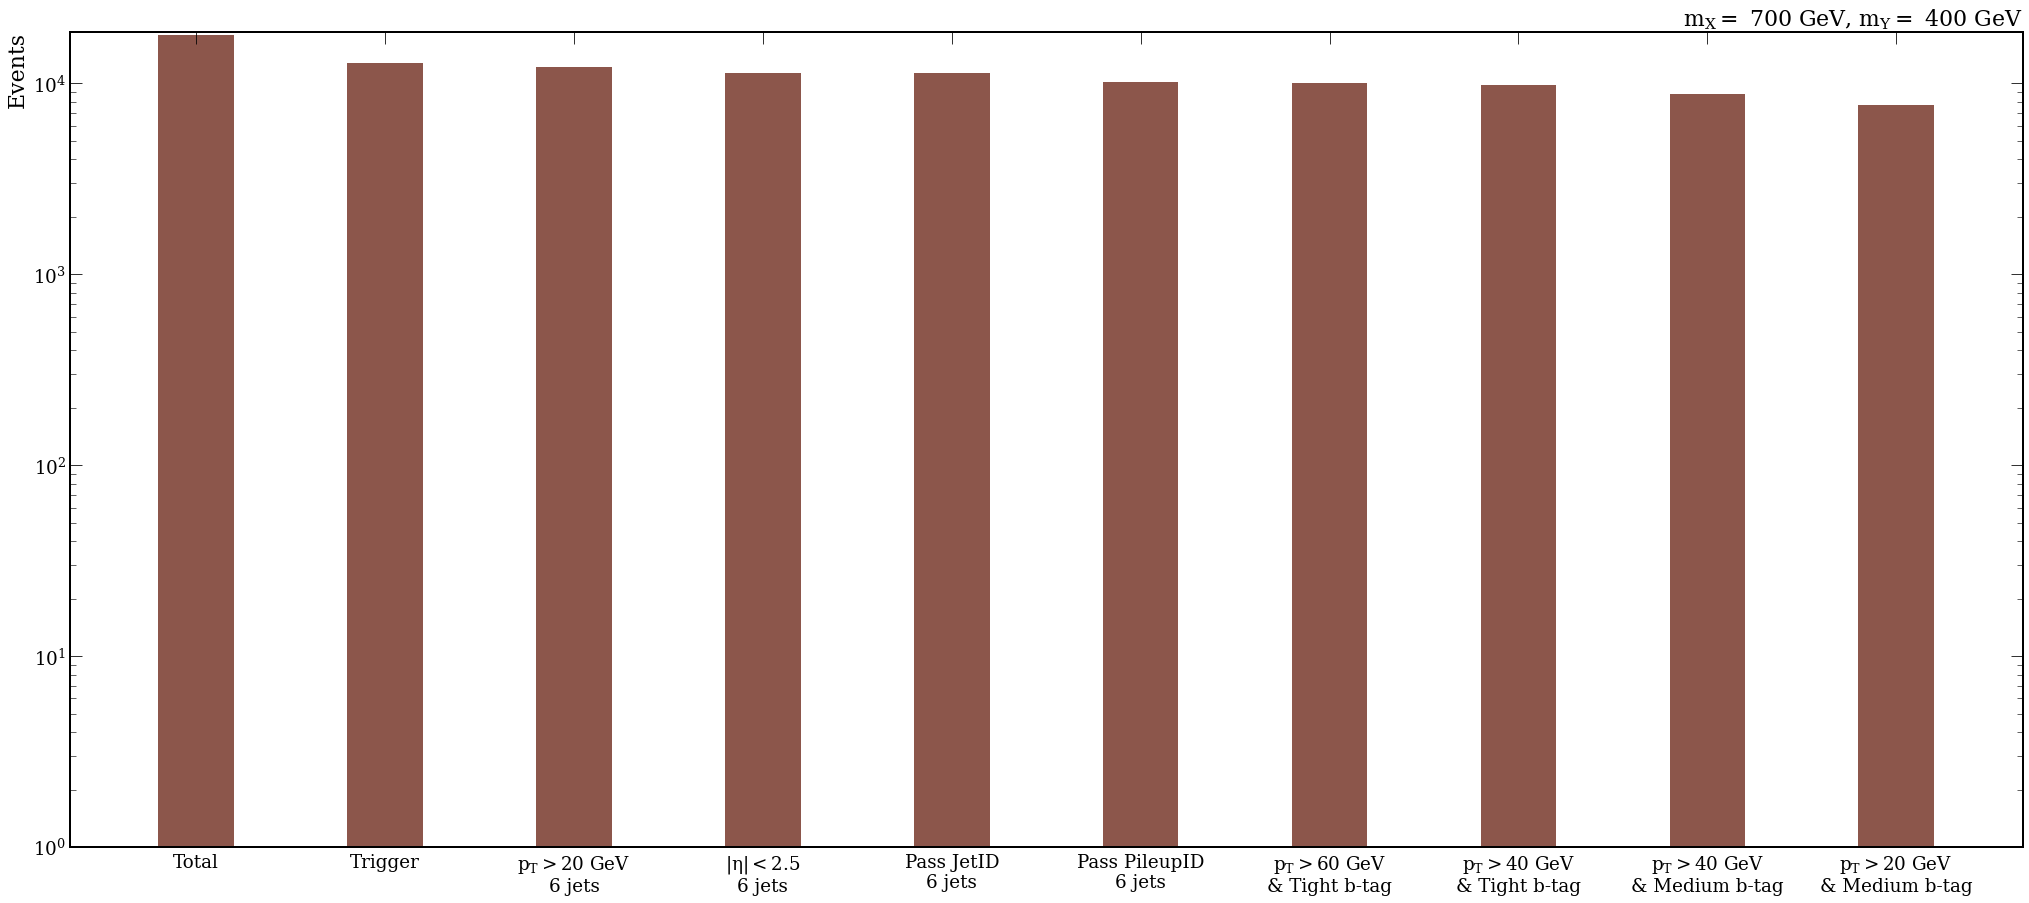

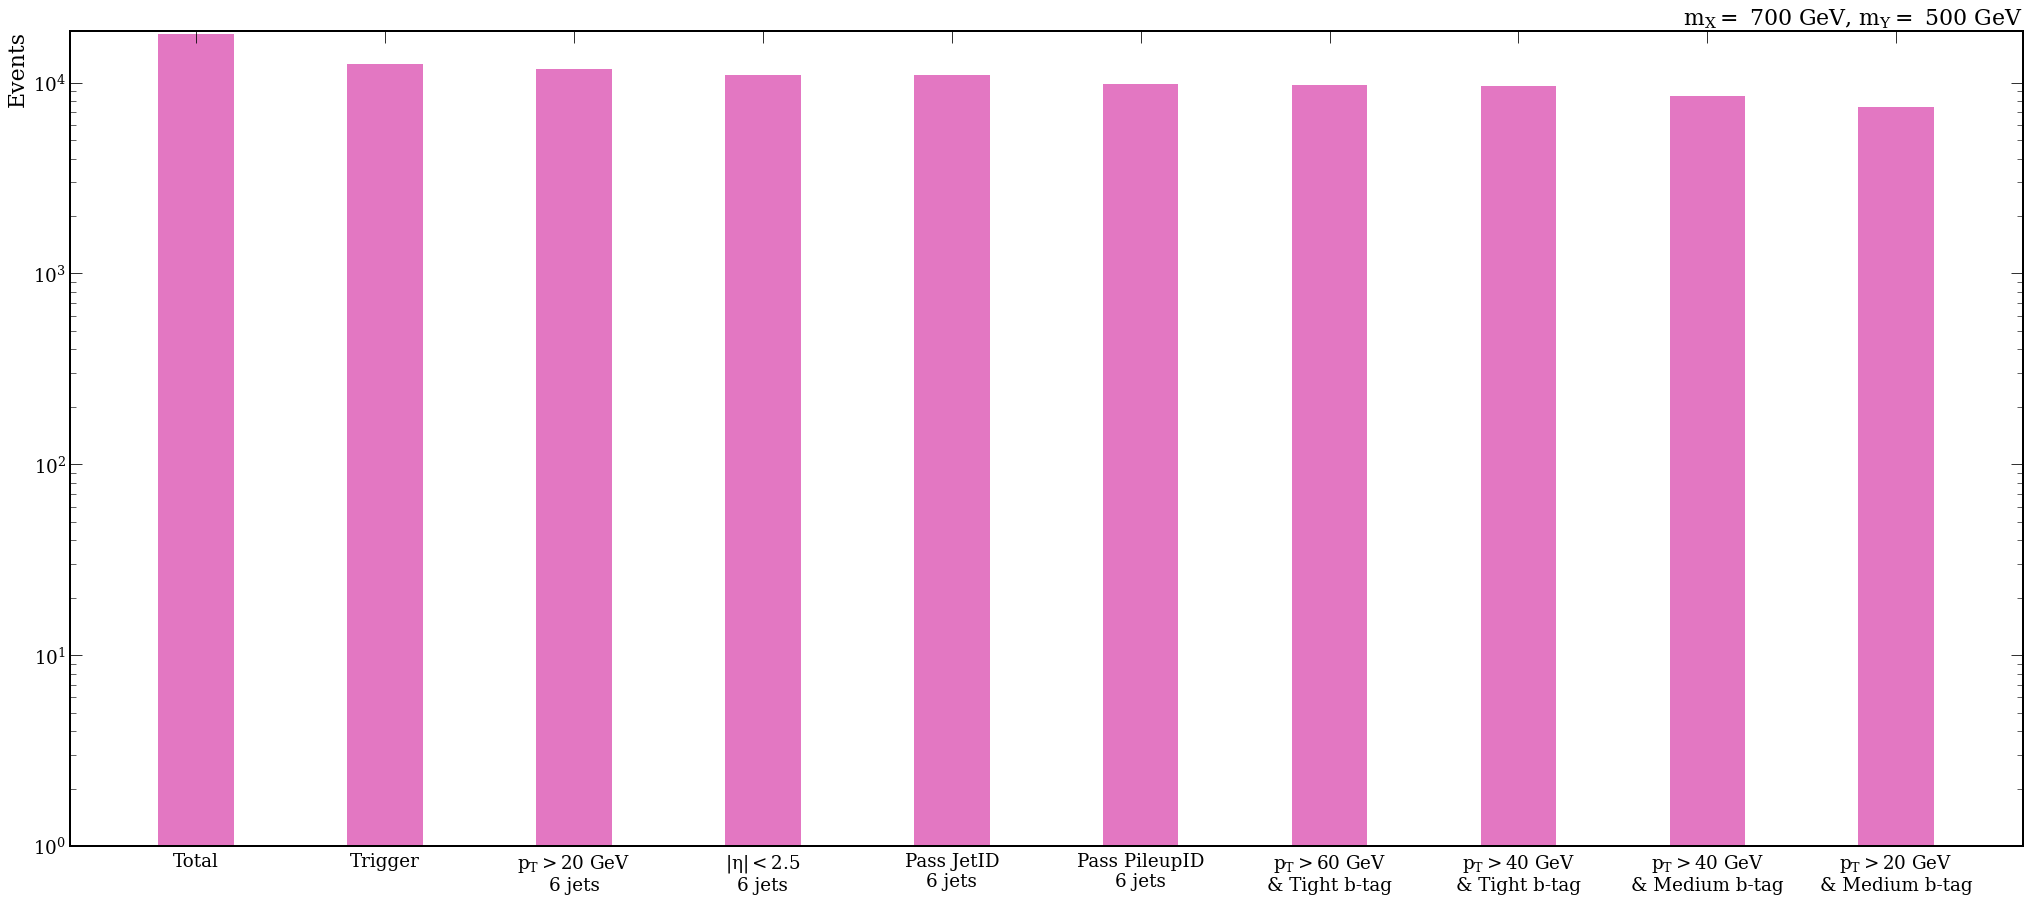

In [ ]:
year = 2018
for i,(sample,cutflow) in enumerate(zip(NMSSM_List,cutflows)):
    fig, ax = plt.subplots(figsize=(35,15))
    mass_point = sample.split("/")[-2] # extract mass point for saving plots
    cf = cutflow
    bar = ax.bar(x=np.arange(0,ncuts), height=cf, width=0.4, align='center', log=True, color='C'+str(i))
    ax.set_title(makeTitle(sample), loc='right')
    ax.xaxis.set_tick_params(which='minor', bottom=False, top=False)
    ax.xaxis.set_tick_params(which='major', bottom=False, top=True)
    ax.set_xticks(np.arange(0,ncuts))
    ax.set_xticklabels(cf_labels[::-1], ha='center')
    ax.set_ylabel('Events')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(1,ymax)
    fig.savefig(f'plots/{mass_point}_cutflow_bar.pdf')

# ymin, ymax = ax.get_ylim()
# ax.set_ylim(1, ymax*50)


In [ ]:
year = 2018
for sample,cutflow in zip(NMSSM_List, cutflows):
# for sample in [NMSSM_MX_700_MY_400]:
    mass_point = sample.split("/")[-2] # extract mass point for saving plots
    
    # create cutflow object
    cf = cutflow

    # make figure and axis objects
    fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,1]}, sharey=True)

    # first axis will contain horizontal bar chart
    ax = axs[0]
    # bar = ax.barh(y=np.arange(ncuts+0.4,0.4,-1), width=bkgd_tree.cutflow[:ncuts], height=0.4, align='center', log=True)
    bar = ax.barh(y=np.arange(ncuts,0,-1), width=cf, height=0.4, align='center', log=True)
    ax.yaxis.set_tick_params(which='minor', bottom=False, top=False)
    ax.yaxis.set_tick_params(which='major', bottom=False, top=True)
    ax.xaxis.set_major_locator(ticker.LogLocator(numticks=10))
    ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=True))
    ax.xaxis.set_minor_locator(ticker.LogLocator(subs=np.arange(10), numticks=10))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    ax.set_yticks(np.arange(1.2,ncuts+1.2))
    # ax.set_yticklabels(cf_labels[ncuts-1:])
    ax.set_yticklabels(cf_labels)
    ax.set_title(makeTitle(sample), loc='right')

    ax = axs[1]
    ax.axis('off')
    ax.text(-0.1,1,'Background, Abs %,   Rel %', transform=ax.transAxes, fontdict={'fontsize':18})
    # ax.text(-0.1,1,'Background, Abs %,   Rel %', transform=ax.transAxes, fontdict={'fontsize':18})
    ax.text(0.5,1,'Signal,        Abs %,   Rel %', transform=ax.transAxes, fontdict={'fontsize':18})
    ax.add_line(lines.Line2D([-0.1, 0.4], [0.98,0.98], transform=ax.transAxes, color='k', linewidth=2, clip_on=False))
    ax.add_line(lines.Line2D([0.5, 1], [0.98,0.98], transform=ax.transAxes, color='k', linewidth=2, clip_on=False))

    for i,(ypos, n_bkgd, n_sig) in enumerate(zip(np.arange(ncuts+0.2,0.2,-1), bkgd_tree.cutflow, cf)):
        if i == 0: 
            ax.text(-0.1, ypos, as_si(n_bkgd,2))
            ax.text(0.1, ypos, f"100%")
            ax.text(0.3, ypos, f"")
            ax.text(0.5, ypos, as_si(n_sig,2))
            ax.text(0.7, ypos, f"100%")
            ax.text(0.85, ypos, f"")
        else:
            ax.text(-0.1, ypos, as_si(n_bkgd,2))
            # ax.text(-0.1, ypos, f"{as_si(n_bkgd/bkgd_tree.cutflow[0], 2)}")
            ax.text(0.1, ypos, f"{n_bkgd/bkgd_tree.cutflow[0]*100:.5f}%")
            ax.text(0.3, ypos, f"{n_bkgd/bkgd_tree.cutflow[i-1]*100:.0f}%")
            # ax.text(0.5, ypos, f"{as_si(n_sig/signal_tree.cutflow[0], 2)}")
            ax.text(0.5, ypos, as_si(n_sig,2))
            ax.text(0.7, ypos, f"{n_sig/cf[0]*100:.0f}%")
            ax.text(0.85, ypos, f"{n_sig/cf[i-1]*100:.0f}%")

        fig.savefig(f'plots/{mass_point}_cutflow_plot_table.pdf')

NameError: name 'NMSSM_List' is not defined

In [ ]:
fig, ax, n, b = Hist(x=np.arange(0.5,11.5), weights=bkgd_tree.cutflow, bins=np.arange(12), linewidth=2, label='QCD + TTbar')
for bin,val in zip(b[1:-1],n[:-1]):
    ax.plot([bin,bin],[0,val], c='C0', linewidth=2)
print(n[-1])
fig, ax, n, b = Hist(x=np.arange(0.5,11.5), weights=signal_tree.cutflow, bins=np.arange(12), linewidth=2, label='Signal', fig=fig, ax=ax)
for bin,val in zip(b[1:-1],n[:-1]):
    ax.plot([bin,bin],[0,val], c='C1', linewidth=2)
ax.set_ylim(10,1e12)
ax.set_yscale('log')
ax.set_ylabel('Events Passing')
ax.set_xticks(np.arange(0,11))
ax.set_xticklabels(labels=['Total','Trigger',r'$p_T<20$ GeV', r'$|\eta|<2.5$', 'JetID', 'PileupID', r'$n_\mathrm{jets} > 6$', r'$p_T>60$ GeV & High b-tag', r'$p_T>40$ GeV & High b-tag', r'$p_T>40$ GeV & Medium b-tag', r'$p_T>20$ GeV & Medium b-tag'], rotation=315, ha='left', fontfamily='serif')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')

fig.savefig('plots/event_preselection.pdf', bbox_inches='tight')

NameError: name 'bkgd_tree' is not defined